In [52]:
#| echo: false
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.dates as mdates
import datetime as dt
import seaborn as sns
import folium 
from folium.plugins import HeatMap

from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('retina')

import warnings
warnings.filterwarnings('ignore')

In [53]:
#| echo: false
df = pd.read_csv('./iFlowDatos_Limpios.csv')

<hr></hr>

# Consigna

iFlow es una empresa argentina dedicada a la logística integral, con alcance tanto nacional como internacional. Fue creada para Co-Gerenciar y operar las cadenas de abastecimiento de sus clientes en Argentina y MERCOSUR.

La base de datos contiene información transaccional de 27.484 entregas de pedidos para dos clientes de la empresa iFlow. Las entregas registradas abarcan un período temporal de aproximadamente tres meses. 

El desafío consiste en realizar un análisis y descripción global de la base que permita entender y visualizar las características más releventes de la misma. Es importante notar que al ser una base de datos real, la misma puede contener errores, omisiones e inconsistencias. Estas últimas características son también de interés para el análisis.

Resolverán el caso para brindar una solución eficaz, inteligente y  creativa al problema planteado.

<hr></hr>

# Análisis Exploratorio de los Datos

A continuación, se mostrarán los resultados de un exhaustivo análisis exploratorio de la base de datos. Los gráficos enseñados fueron meticulosamente diseñados y creados con el fin de facilitar la interpretación del mensaje que se quiere transmitir con ellos.

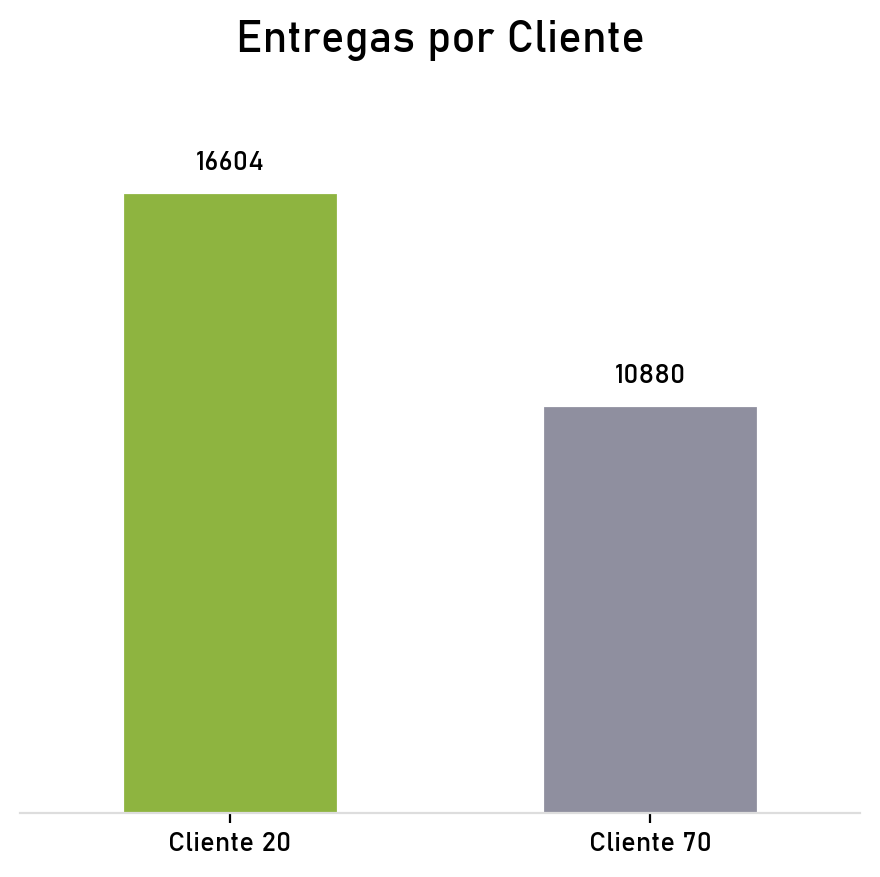

In [114]:
#| echo: false
entregas_por_cliente = df['cliente'].value_counts().reset_index().rename(columns={'cliente':'cantidad','index':'cliente'})
entregas_por_cliente['cliente'] = entregas_por_cliente['cliente'].replace({20: 'Cliente 20',70: 'Cliente 70'})
mpl.rcParams['font.family'] = 'Bahnschrift'
# Create the bar plot
plt.figure(figsize=(4.5, 4.5))
ax = sns.barplot(x='cliente', y='cantidad', width=.5, data=entregas_por_cliente)

colors = ['#8eb440', '#8f8f9f']  # Colores deseados
for i, bar in enumerate(ax.patches):
    bar.set_color(colors[i])

# Customize appearance
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.yaxis.set_visible(False)
plt.ylim(0, 20000)

# Add text labels on the bars
for bar in ax.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 500, int(yval), ha='center', va='bottom', fontsize=10)

# Add labels and title
plt.xlabel('')
plt.title('Entregas por Cliente', fontsize=16, fontweight='bold')

# Show the plot
plt.tight_layout()
plt.show()

Observando el gráfico, se puede ver como en el transcurso de los meses de Mayo, Junio y Julio la empresa realizó una cantidad significativamente mayor de entregas al Cliente 20 que al Cliente 70. Con una diferencia de 5724 entregas, el **Cliente 20 tuvo un total de 52.61% más de entregas que el Cliente 70**.

En relación con el total de entregas realizadas, **el 60.41% de ellas fueron realizadas al Cliente 20; mientras que el 39.59% fueron hechas al Cliente 70**.

<div></div>
<div></div>

Análizando a la provincia de Buenos Aires y a la Ciudad Autónoma de Buenos Aires (CABA) por separado, se puede notar cómo **el 92.57% del total de las entregas fueron hechas en CABA mientras que el 7.43% restante en Buenos Aires.**

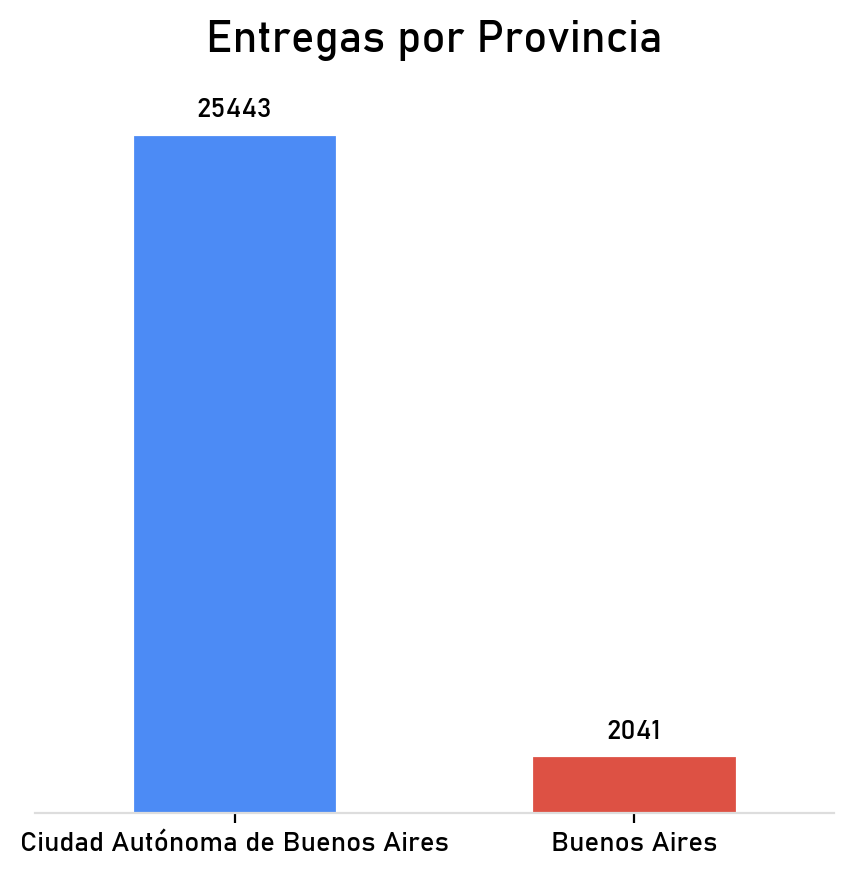

In [113]:
#| echo: false
entregas_por_cliente = df['provincia'].value_counts().reset_index().rename(columns={'provincia':'cantidad','index':'provincia'}).sort_index()
mpl.rcParams['font.family'] = 'Bahnschrift'
# Create the bar plot
plt.figure(figsize=(4.5, 4.5))
ax = sns.barplot(x='provincia', y='cantidad', width=.5, data=entregas_por_cliente)

colors = ['#4C8BF5', '#DD5144']  # Colores deseados
for i, bar in enumerate(ax.patches):
    bar.set_color(colors[i])

# Customize appearance
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.yaxis.set_visible(False)
plt.ylim(0, 28000)

# Add text labels on the bars
for bar in ax.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 500, int(yval), ha='center', va='bottom', fontsize=10)

# Add labels and title
plt.xlabel('')
plt.title('Entregas por Provincia', fontsize=16, fontweight='bold')

# Show the plot
plt.tight_layout()
plt.show()

Si evaluamos por separado la proporción de entregas hechas a cada cliente por provincia, se puede observar como la gran mayoría de las entregas en Buenos Aires son para el Cliente 20, mientras que la proporción en CABA es un poco más pareja: 42.44% del Cliente 70 y 57.56% del Cliente 20.

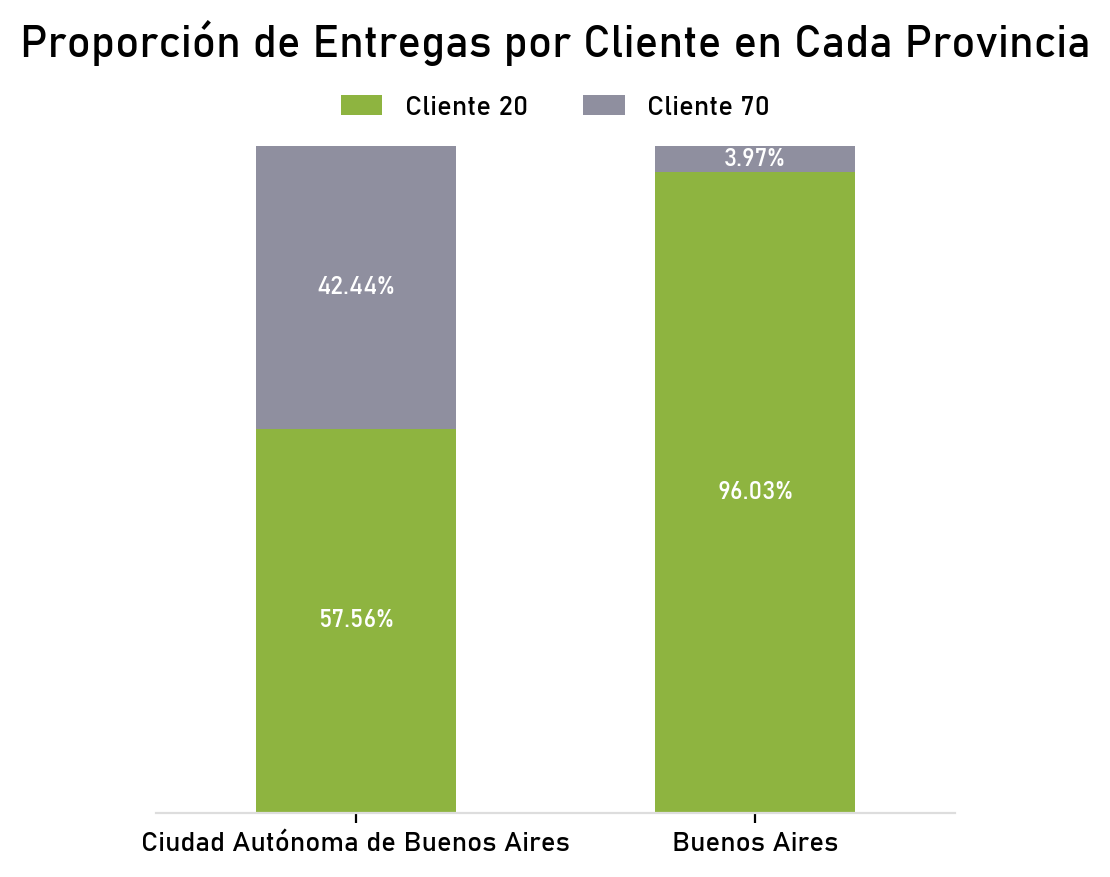

In [117]:
#| echo: false
counts = df.groupby(['provincia', 'cliente']).size().unstack(fill_value=0)

# Calcular las proporciones
proportions = counts.div(counts.sum(axis=1), axis=0).sort_index(ascending=False)

# Configurar la familia de fuentes
plt.rcParams['font.family'] = 'Bahnschrift'

# Crear la figura del gráfico de barras apiladas
# plt.figure(figsize=(3, 5))

# Colores deseados para cada cliente
colors = ['#8eb440', '#8f8f9f']

# Crear el gráfico de barras apiladas
ax = proportions.plot(kind='bar', stacked=True, width=0.5, color=colors, figsize=(4.5,4.5))

# Personalizar la apariencia
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.yaxis.set_visible(False)
legend_labels = ['Cliente 20', 'Cliente 70']
ax.legend(legend_labels, loc='upper center', bbox_to_anchor=(0.5, 1.06), fontsize=10, frameon=False, ncol=2, handlelength=1.5)

# Añadir etiquetas de texto en las barras
for i in range(len(proportions)):
    for j, bar in enumerate(ax.patches[i * len(counts.columns):(i + 1) * len(counts.columns)]):
        yval = bar.get_height()
        if yval > 0:  # Solo agregar la etiqueta si el valor es mayor a 0
            ax.text(bar.get_x() + bar.get_width() / 2, bar.get_y() + yval / 2, f'{yval:.2%}', 
                    ha='center', va='center', fontsize=9, color='white')

# Configurar las etiquetas y el título
plt.xticks(rotation=0)
plt.xlabel('', fontsize=12)
plt.title('Proporción de Entregas por Cliente en Cada Provincia', fontsize=16, fontweight='bold', pad=20)

# Ajustar el layout para que no haya solapamiento
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [57]:
#| echo: false
df_cliente_70 = df[df['cliente']==70]
df_cliente_20 = df[df['cliente']==20]

<hr></hr>

# Entregas por Día

Como se puede observar en el gráfico de abajo, **de Mayo a Julio las entregas realizadas a los clientes aumentó en casi un 11%**, pese a haber tenido un leve pero irrelevante declive en Junio.

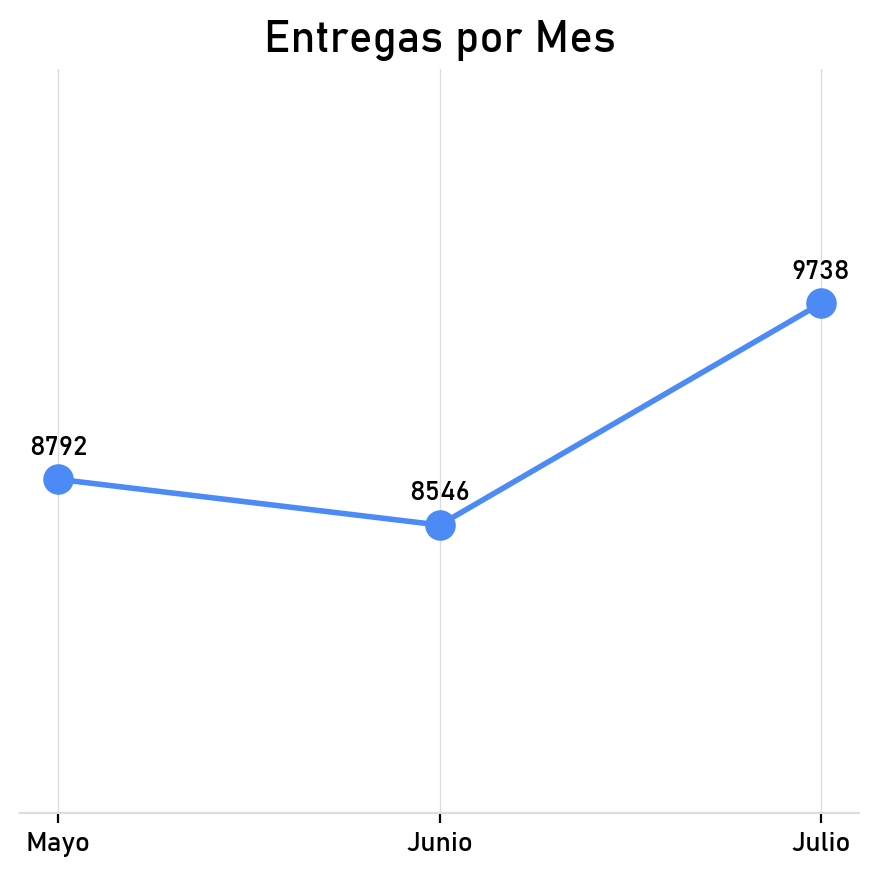

In [118]:
#| echo: false
# Suponiendo que tienes los datos ya definidos como en tu código original
meses_orden = ['Mayo', 'Junio', 'Julio']
cantidad_pedidos = df['mes'].value_counts().reindex(meses_orden).values

# Configurar la fuente
mpl.rcParams['font.family'] = 'Bahnschrift'

# Crear el gráfico de línea
plt.figure(figsize=(4.5, 4.5))
plt.plot(meses_orden, cantidad_pedidos, marker='o', linestyle='-', color='#4C8BF5', linewidth=2, markersize=10)  # Aumentar grosor de línea y tamaño de marcadores

# Personalizar la apariencia
ax = plt.gca()  # Obtener el eje actual
ax.spines['top'].set_visible(False)  # Ocultar la espina superior
ax.spines['right'].set_visible(False)  # Ocultar la espina derecha
ax.spines['left'].set_visible(False)  # Ocultar la espina izquierda
ax.spines['bottom'].set_color('#DDDDDD')  # Cambiar el color de la espina inferior
ax.yaxis.set_visible(False)  # Ocultar el eje y
plt.ylim(7000, 11000)  # Ajustar límites del eje y

# Agregar títulos y etiquetas
plt.title('Entregas por Mes', fontsize=16, fontweight='bold')  # Aumentar el tamaño y hacer negrita
plt.xlabel('', fontsize=12)

# Mostrar el gráfico
plt.grid(color='#DDDDDD', linestyle='-', linewidth=0.5, which='both', axis='x')  # Mostrar cuadrícula solo en el eje x

# Agregar etiquetas en los puntos de datos
for x, y in zip(meses_orden, cantidad_pedidos):
    plt.text(x, y + 100, int(y), ha='center', va='bottom', fontsize=10)  # Ajustar el posicionamiento de las etiquetas

# Ajustar el diseño
plt.tight_layout()  
plt.show()


Segmentando las entregas hechas a cada cliente, se puede ver como las entregas a ambos clientes tuvieron comportamientos similares pero con notables diferencias:

Las entregas realizadas al Cliente 20 fue en aumento en cada mes, teniendo un aumento significativo de Junio a Julio de un 16%. Por otro lado, cuando estudiamos las entregas realizadas al Cliente 70, en Junio hubo una disminución de 8%, pero dicha reducción en entregas fue recuperada en Julio, volviendo a los niveles de entregas realziados en Mayo.

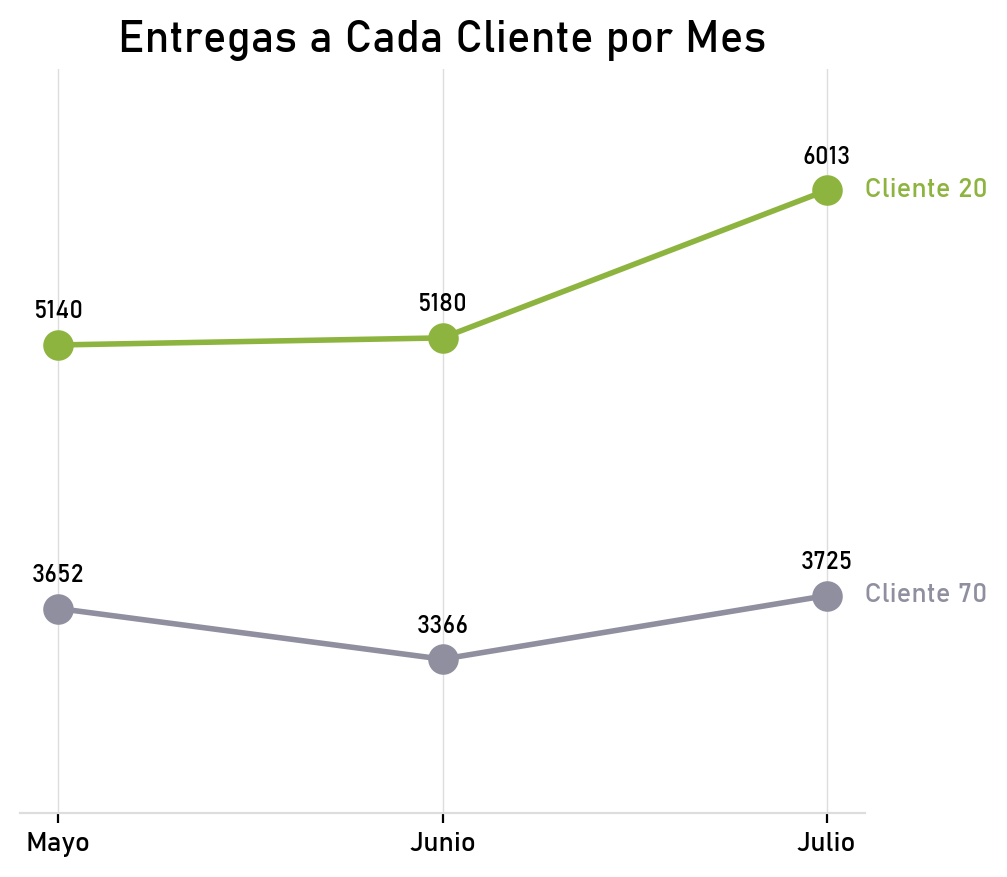

In [119]:
#| echo: false
# Obtener el DataFrame con la cantidad de clientes por mes
clientes_por_mes = df.groupby('mes')['cliente'].value_counts().unstack().reindex(meses_orden)
clientes_por_mes.index
# Configurar la fuente
mpl.rcParams['font.family'] = 'Bahnschrift'

# Definir los colores para los clientes
colors = ['#8eb440', '#8f8f9f']

# Crear el gráfico de líneas
plt.figure(figsize=(5.15, 4.5))
for i, cliente in enumerate(clientes_por_mes.columns):
    plt.plot(clientes_por_mes.index, clientes_por_mes[cliente], marker='o', label=cliente,
             linewidth=2, markersize=10, color=colors[i])  # Asignar color específico

    # Agregar texto al final de la línea con desplazamiento a la derecha
    plt.text(clientes_por_mes.index[-1], clientes_por_mes[cliente].iloc[-1],
             f'     Cliente {cliente}', ha='left', va='center', fontsize=10, color=colors[i])  # Ajustar la posición

    # Agregar valores en cada punto de la línea
    for mes, valor in zip(clientes_por_mes.index, clientes_por_mes[cliente]):
        plt.text(mes, valor + 150, valor, ha='center', fontsize=9, color='black')  # Ajustar la posición

# Personalizar la apariencia
ax = plt.gca()  # Obtener el eje actual
ax.spines['top'].set_visible(False)  # Ocultar la espina superior
ax.spines['right'].set_visible(False)  # Ocultar la espina derecha
ax.spines['left'].set_visible(False)  # Ocultar la espina izquierda
ax.spines['bottom'].set_color('#DDDDDD')  # Cambiar el color de la espina inferior
ax.yaxis.set_visible(False)  # Ocultar el eje y
plt.ylim(2500, 6700)  # Ajustar límites del eje y

# Agregar títulos y etiquetas
plt.title('Entregas a Cada Cliente por Mes', fontsize=16, fontweight='bold')  # Aumentar tamaño y hacer negrita
plt.xlabel('', fontsize=12)

# Configurar el gráfico
plt.grid(color='#DDDDDD', linestyle='-', linewidth=0.5, which='both', axis='x')  # Mostrar cuadrícula solo en el eje x

# Ajustar el diseño
plt.tight_layout()
plt.show()


In [61]:
#| echo: false
# Supongamos que df ya está definido y contiene las columnas 'VisitaFecha' y 'cliente'
asd = df[['VisitaFecha', 'cliente']].value_counts().to_frame().reset_index().sort_values(by='VisitaFecha')[:-3].sort_values(by=['cliente', 'VisitaFecha']).reset_index(drop=True).rename(columns={0:'cantidad'})
asd['VisitaFecha'] = pd.to_datetime(asd['VisitaFecha'])

# Contar clientes únicos por fecha
cliente_counts = asd.groupby('VisitaFecha')['cliente'].nunique().reset_index()

# Filtrar fechas con solo un cliente
fechas_un_cliente = cliente_counts[cliente_counts['cliente'] == 1]['VisitaFecha']

# Identificar clientes únicos
clientes = asd['cliente'].unique()

# Crear un nuevo DataFrame para las filas con cantidad 0
nuevas_filas = []

for fecha in fechas_un_cliente:
    # Obtener el cliente que falta en esa fecha
    clientes_en_fecha = asd[asd['VisitaFecha'] == fecha]['cliente'].unique()
    cliente_faltante = [cliente for cliente in clientes if cliente not in clientes_en_fecha]

    # Crear una nueva fila con cantidad 0 para el cliente faltante
    for cliente in cliente_faltante:
        nuevas_filas.append({'VisitaFecha': fecha, 'cliente': cliente, 'cantidad': 0})

# Convertir a DataFrame
nuevas_filas_df = pd.DataFrame(nuevas_filas)

# Concatenar el DataFrame original con las nuevas filas
asd = pd.concat([asd, nuevas_filas_df], ignore_index=True)

# Ordenar el DataFrame por fecha y cliente
asd = asd.sort_values(by=['VisitaFecha', 'cliente']).reset_index(drop=True)

Haciendo un análisis de las entregas realizadas en cada uno de los días en el transcurso de este periodo, se puede ver como las entregas rondan entre las 300 y 480 entregas por día, pero aún así se observan días en el que la cantidad de entregas fue significativamente menor a dichos valores.

Luego de investigar dichas fechas, encontramos que en estos días fueron días particulares que afectaron notablemente (Cómo se peude observar en el gráfico) la cantidad de entregas que se terminaron realizando en esos días:
* El 9 de Mayo hubo un paro general.
* El 20 de Junio fue el Día de la Bnadera, día feriado.
* El 21 de Julio fue domingo, parece que se realizó un pedido excepcional ese día porque no es para nada normal ver entregas realziadas los domingos.

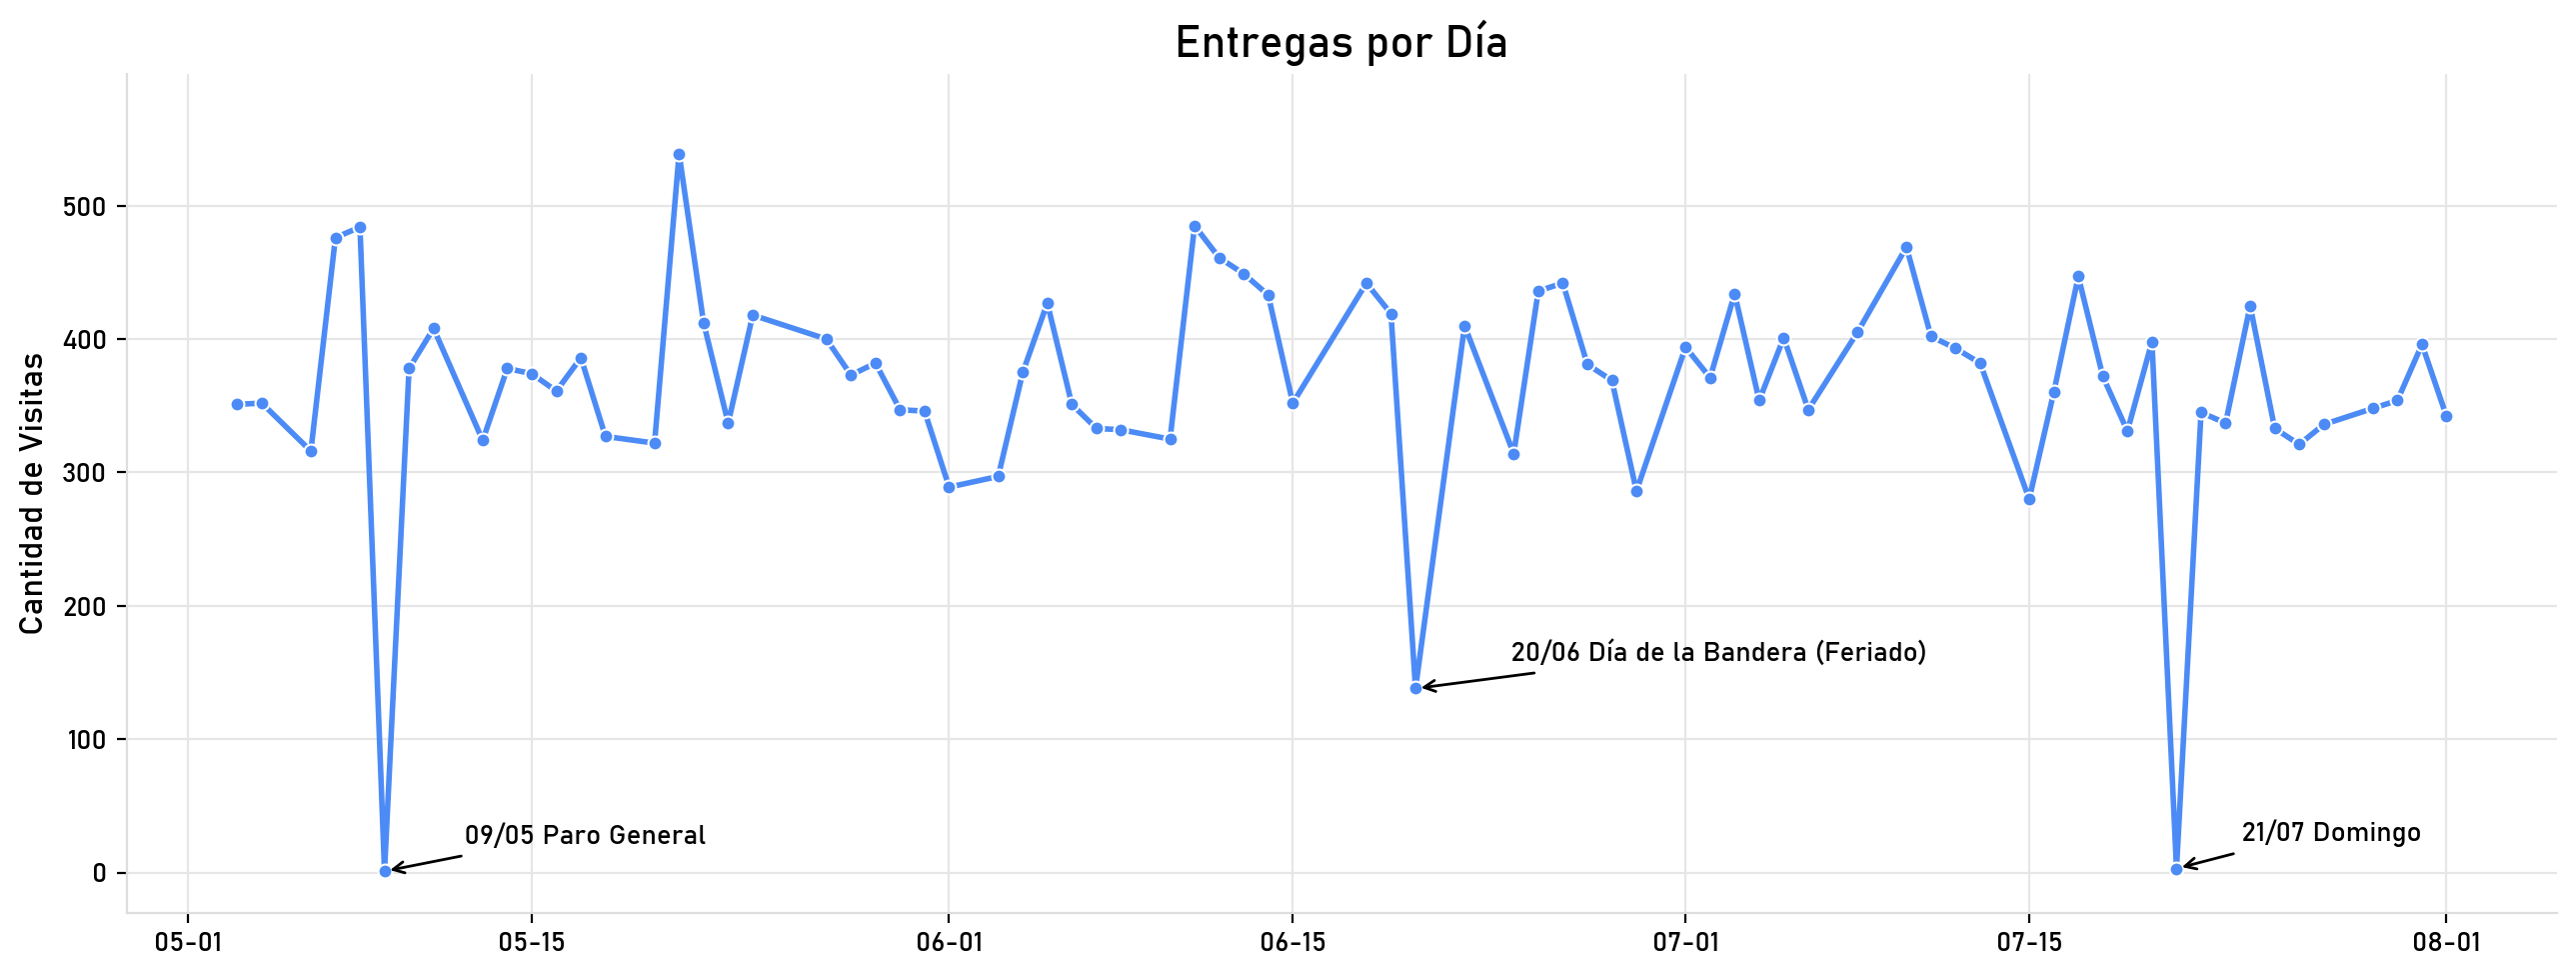

In [120]:
#| echo: false
asd = df['VisitaFecha'].value_counts().to_frame().reset_index().sort_values(by='index').reset_index(drop=True)
asd = asd.rename(columns={'index':'fecha'})[:-3]
asd['fecha'] = pd.to_datetime(asd['fecha'])

# Crear el gráfico de líneas
plt.figure(figsize=(13, 5))

# Ajustar el estilo de la fuente
mpl.rcParams['font.family'] = 'Bahnschrift'

# Ploteo de las líneas
sns.lineplot(x='fecha', y='VisitaFecha', data=asd, marker='o', color='#4C8BF5', linewidth=2, markersize=5)

# Personalizar los bordes del gráfico
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_color('#DDDDDD')
plt.gca().spines['bottom'].set_color('#DDDDDD')

# Agregar comentarios en fechas específicas
comentarios = {
    '2024-05-09': '       09/05 Paro General',
    '2024-06-20': '         20/06 Día de la Bandera (Feriado)',
    '2024-07-21': '     21/07 Domingo',
}

for fecha, comentario in comentarios.items():
    plt.annotate(
        comentario,
        xy=(pd.to_datetime(fecha), asd.loc[asd['fecha'] == pd.to_datetime(fecha), 'VisitaFecha'].values[0]),
        xytext=(10, 10),  # Desplazamiento del texto
        textcoords='offset points',
        arrowprops=dict(arrowstyle='->', color='black', lw=1),  # Flecha
        fontsize=10,
        color='black'
    )

# Configuración del gráfico
plt.title('Entregas por Día', fontsize=16, fontweight='bold')
plt.xlabel('', fontsize=12)
plt.ylabel('Cantidad de Visitas', fontsize=12)
plt.ylim(-30, 599)  # Ajustar límites del eje y
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
# Mostrar la cuadrícula
plt.grid(True, color='#E6E6E6')

# Mostrar el gráfico
plt.tight_layout()  # Asegura que todo se ajuste bien en la figura
plt.show()


Si segmentamos las entregas realizadas en cada día por las hechas a cada cliente, se puede ver como ambos parecieran tener un patrón similar de cantidad de entregas pedidas: Se mantienen dentro de un rango (Para el Cliente 70, entre 110 y 190 entregas por día; y para el Cliente 20 entre 160 y 300 entregas por día).

Una caracterítica a destacar es cómo en el Día de la Bandera, el 20 de Junio, no se le realizó ninguna entrega al Cliente 20, pero se realzó una cantidad normal de entregas al Cliente 70.

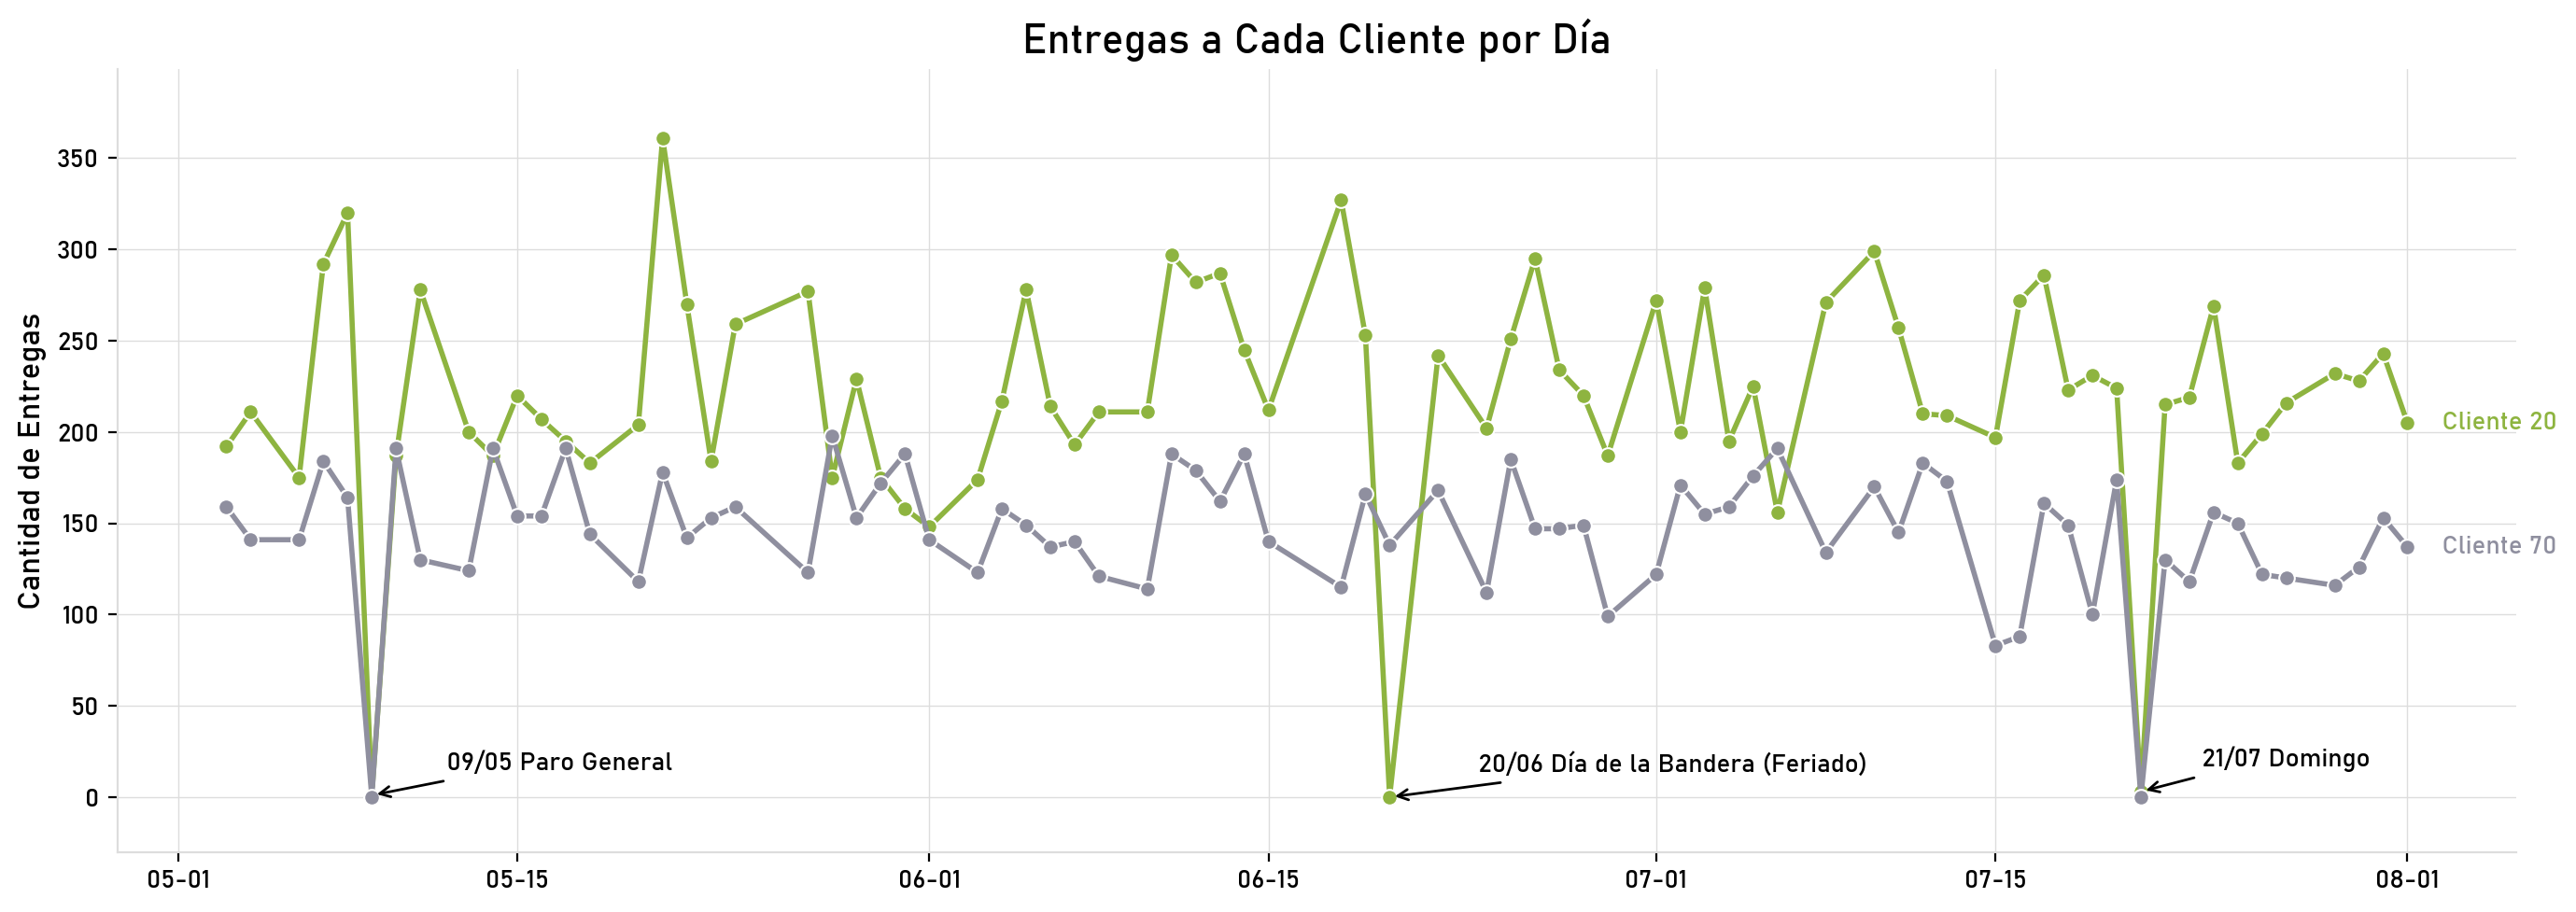

In [121]:
#| echo: false
# Supongamos que df ya está definido y contiene las columnas 'VisitaFecha' y 'cliente'
asd = df[['VisitaFecha', 'cliente']].value_counts().to_frame().reset_index().sort_values(by='VisitaFecha')[:-3].sort_values(by=['cliente', 'VisitaFecha']).reset_index(drop=True).rename(columns={0:'cantidad'})
asd['VisitaFecha'] = pd.to_datetime(asd['VisitaFecha'])

# Contar clientes únicos por fecha
cliente_counts = asd.groupby('VisitaFecha')['cliente'].nunique().reset_index()

# Filtrar fechas con solo un cliente
fechas_un_cliente = cliente_counts[cliente_counts['cliente'] == 1]['VisitaFecha']

# Identificar clientes únicos
clientes = asd['cliente'].unique()

# Crear un nuevo DataFrame para las filas con cantidad 0
nuevas_filas = []

for fecha in fechas_un_cliente:
    # Obtener el cliente que falta en esa fecha
    clientes_en_fecha = asd[asd['VisitaFecha'] == fecha]['cliente'].unique()
    cliente_faltante = [cliente for cliente in clientes if cliente not in clientes_en_fecha]

    # Crear una nueva fila con cantidad 0 para el cliente faltante
    for cliente in cliente_faltante:
        nuevas_filas.append({'VisitaFecha': fecha, 'cliente': cliente, 'cantidad': 0})

# Convertir a DataFrame
nuevas_filas_df = pd.DataFrame(nuevas_filas)

# Concatenar el DataFrame original con las nuevas filas
asd = pd.concat([asd, nuevas_filas_df], ignore_index=True)

# Ordenar el DataFrame por fecha y cliente
asd = asd.sort_values(by=['VisitaFecha', 'cliente']).reset_index(drop=True)
# Configurar la fuente
mpl.rcParams['font.family'] = 'Bahnschrift'

# Definir los colores para los clientes
colors = ['#8eb440', '#8f8f9f']  # Asegúrate de que coincidan con los clientes de tu DataFrame

# Crear el gráfico de líneas
plt.figure(figsize=(14, 5))

# Graficar cada cliente por separado
for i, cliente in enumerate(asd['cliente'].unique()):
    sns.lineplot(
        x='VisitaFecha',
        y='cantidad',
        data=asd[asd['cliente'] == cliente],
        marker='o',
        label=cliente,
        color=colors[i],
        linewidth=2,
        markersize=6,
        legend=False
    )

    # Agregar texto al final de la línea con desplazamiento a la derecha
    plt.text(
        asd['VisitaFecha'].max(), 
        asd[asd['cliente'] == cliente]['cantidad'].iloc[-1],
        f'     Cliente {cliente}', 
        ha='left', 
        va='center', 
        fontsize=10, 
        color=colors[i]
    )

# Personalizar la apariencia
ax = plt.gca()  # Obtener el eje actual
ax.spines['top'].set_visible(False)  # Ocultar la espina superior
ax.spines['right'].set_visible(False)  # Ocultar la espina derecha
ax.spines['left'].set_color('#DDDDDD')  # Ocultar la espina izquierda
ax.spines['bottom'].set_color('#DDDDDD')  # Cambiar el color de la espina inferior
ax.yaxis.set_visible(True)  # Mostrar el eje y (ajustar según sea necesario)
plt.ylim(0, asd['cantidad'].max() + 5)  # Ajustar límites del eje y

comentarios = {
    '2024-05-09': '       09/05 Paro General',
    '2024-06-20': '         20/06 Día de la Bandera (Feriado)',
    '2024-07-21': '     21/07 Domingo',
}

for fecha, comentario in comentarios.items():
    plt.annotate(
        comentario,
        xy=(pd.to_datetime(fecha), asd.loc[asd['VisitaFecha'] == pd.to_datetime(fecha), 'cantidad'].values[0]),
        xytext=(10, 10),  # Desplazamiento del texto
        textcoords='offset points',
        arrowprops=dict(arrowstyle='->', color='black', lw=1),  # Flecha
        fontsize=10,
        color='black'
    )

# Agregar títulos y etiquetas
plt.title('Entregas a Cada Cliente por Día', fontsize=16, fontweight='bold')  # Aumentar tamaño y hacer negrita
plt.ylabel('Cantidad de Entregas', fontsize=12)
plt.xlabel('', fontsize=12)

# Configurar el gráfico
plt.grid(color='#DDDDDD', linestyle='-', linewidth=0.5, which='both')  # Mostrar cuadrícula solo en el eje x
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.ylim(-30,399)
# Ajustar el diseño
plt.tight_layout()

# Mostrar el gráfico
plt.show()


### Entregas por Día de la Semana 

Calculando la cantidad de entregas realizadas por día de la semana, podemos ver un claro patrón: La mayoría de ;as entregas se realizan los Martes y Miércoles, siendo el día con menor entregas los Lunes, seguido de Jueves, Viernes y Sábado.

Es importante destacar el día Jueves, el cual es el segundo menor día en el que se realizaron entregas. Esto es así ya que de Mayo a Julio, el Día de la Bandera y el Paro General del 9 de Mayo fueron días Jueves, por lo que la cantidad de entregas realizadas en dicho día resulto afectada por estos eventos, algo que se puede notar en el gráfico de abajo.

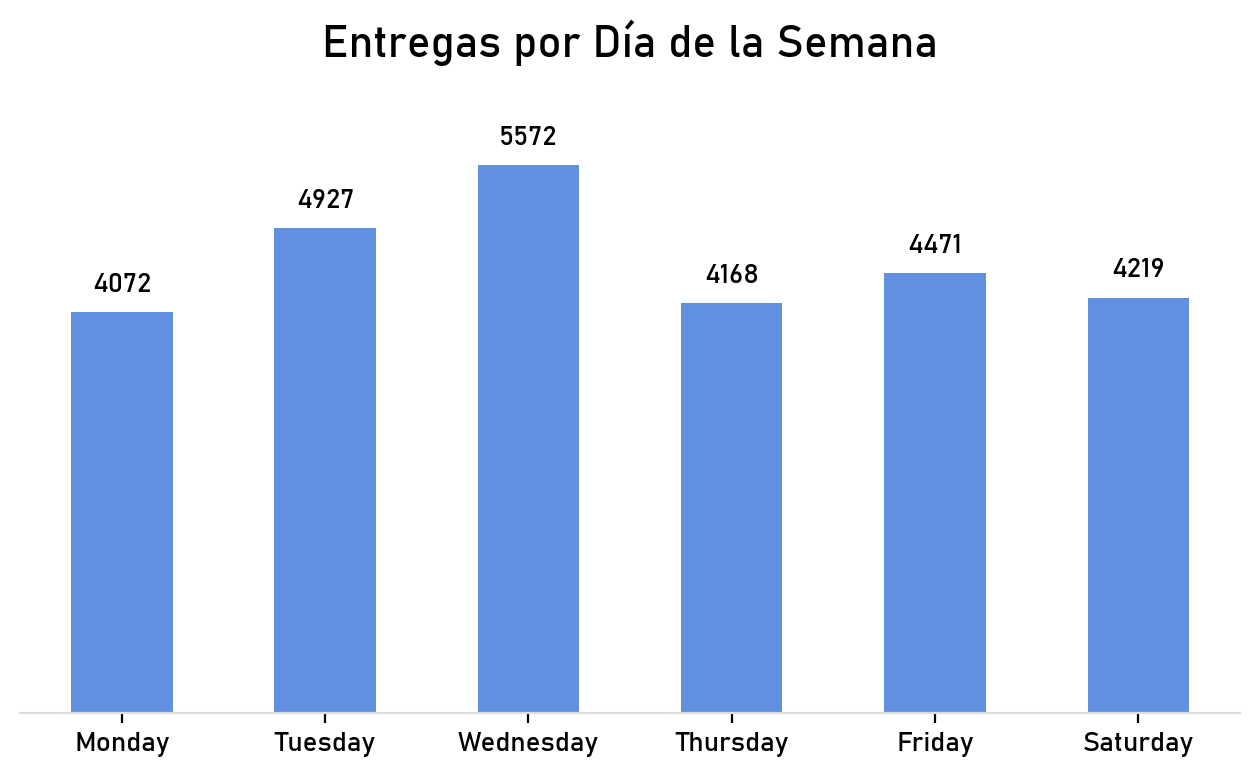

In [64]:
#| echo: false
# Supongamos que df ya está definido y contiene la columna 'VisitaDia'
dias_semana = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
cantidad_pedidos_por_dia = df['VisitaDia'].value_counts().reindex(dias_semana).reset_index()
cantidad_pedidos_por_dia.columns = ['Día de la semana', 'Cantidad']

# Configurar la fuente
mpl.rcParams['font.family'] = 'Bahnschrift'

# Crear el gráfico de barras
plt.figure(figsize=(6.4, 4))
ax = sns.barplot(x='Día de la semana', y='Cantidad', width=.5, data=cantidad_pedidos_por_dia, color='#4C8BF5')

# Personalizar apariencia
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.yaxis.set_visible(False)  # Mostrar el eje y
plt.ylim(0, 6500)  # Ajustar el límite superior del eje y

# Agregar etiquetas de texto sobre las barras
for bar in ax.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 150, int(yval), ha='center', va='bottom', fontsize=10)

# Agregar título y etiquetas
plt.title('Entregas por Día de la Semana', fontsize=16, fontweight='bold')  # Aumentar tamaño y hacer negrita
plt.xlabel('')  # Sin etiqueta para el eje x

# Mostrar el gráfico
plt.tight_layout()
plt.show()


In [65]:
#| echo: false
cantidad_pedidos_por_dia = df[['VisitaDia','cliente']].value_counts().reset_index().rename(columns={0:'cantidad'}).drop([12])
mapeo = {20:'Cliente 20', 70: 'Cliente 70'}
cantidad_pedidos_por_dia = cantidad_pedidos_por_dia.replace(mapeo)
cantidad_pedidos_por_dia = cantidad_pedidos_por_dia.reindex([2,1,0,5,3,4,11,8,6,9,7,10])

Segmentando la cantidad de entregas por cliente en cada día de la semana, se ve como ambos parecieran tener un mismo patrón de entregas realizadas.

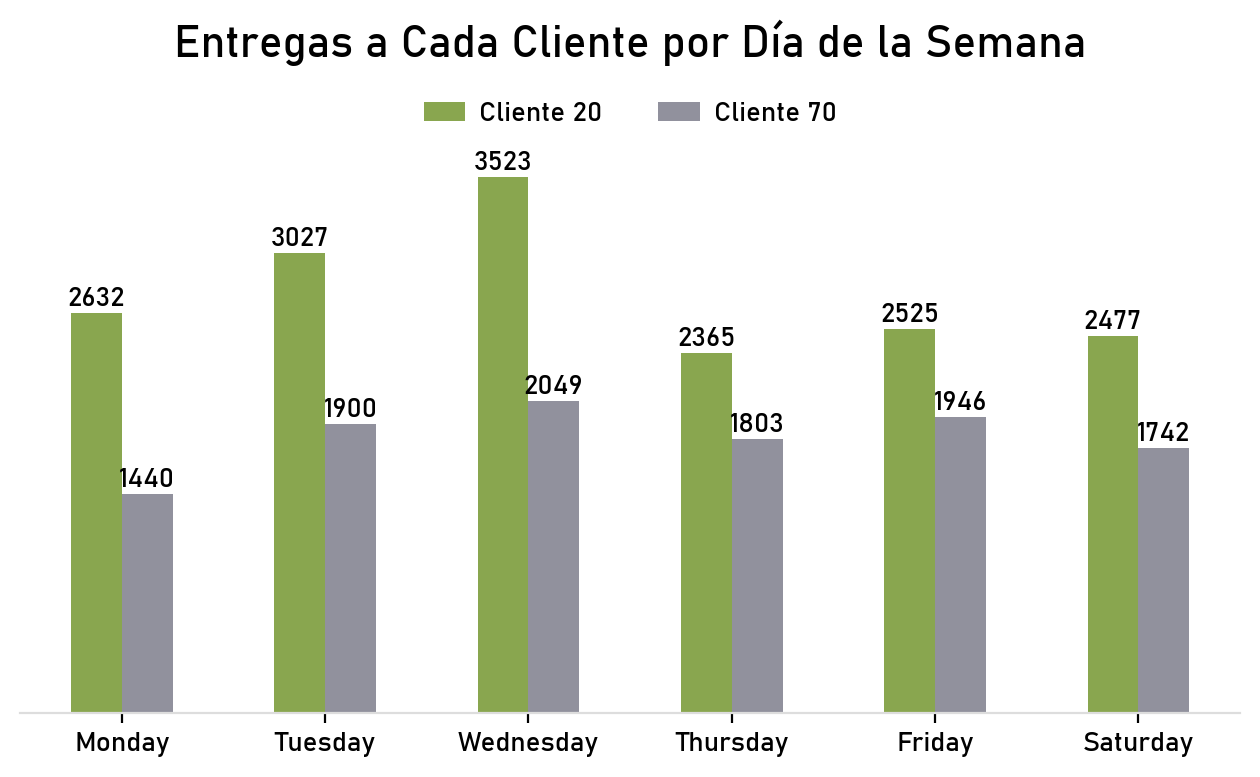

In [66]:
#| echo: false
# Configurar la fuente
mpl.rcParams['font.family'] = 'Bahnschrift'

# Crear el gráfico de barras
plt.figure(figsize=(6.4, 4))
palette = {'Cliente 20': '#8eb440', 'Cliente 70': '#8f8f9f'}  # Usa las etiquetas correctas de los clientes
ax = sns.barplot(x='VisitaDia', y='cantidad', hue='cliente', width=.5, data=cantidad_pedidos_por_dia, palette=palette)

# Personalizar apariencia
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.yaxis.set_visible(False)  # Mostrar el eje y
plt.ylim(0, 3950)  # Ajustar el límite superior del eje y

# Agregar etiquetas de texto sobre las barras
for bar in ax.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 10, int(yval), ha='center', va='bottom', fontsize=10)

# Agregar título y etiquetas
plt.title('Entregas a Cada Cliente por Día de la Semana', fontsize=16, fontweight='bold', pad=20)  # Aumentar tamaño y hacer negrita
plt.xlabel('')  # Sin etiqueta para el eje x

# Configurar la leyenda
legend_labels = ['Cliente 20', 'Cliente 70']
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.06), fontsize=10, frameon=False, ncol=2, handlelength=1.5, 
          handletextpad=0.5)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


<hr></hr>

# Entregas por Localización

A continuación, creamos un heatmap para entender en que municipios y localidades de la provincia de Buenos Aires y de la Ciudad Autónoma de Buenos Aires se realizan todas las entregas.

#### Heatmap de entregas totales

In [97]:
#| echo: false
# Crear el mapa centrado en Buenos Aires
m = folium.Map(location = [-34.603722, -58.381592], zoom_start = 12)

# Paso 1: Crear el HeatMap con todas las coordenadas de los repartos
heat_data = df[['latitud', 'longitud']].values.tolist()  # Coordenadas individuales de los repartos

# Añadir el HeatMap
HeatMap(heat_data, 
        min_opacity=0.3,  
        max_opacity=0.8,  
        radius=25,        
        blur=15,          
        gradient={        
            0.1: 'blue',    
            0.4: 'green',   
            0.7: 'yellow',  
            1.0: 'red'      
        }).add_to(m)

# Guardar el mapa en un archivo HTML
m

Observando el Heatmap, podemos observar que pareciera haber zonas geográficas que se tienden a realizar más entregas que en otras. A continuación, mostramos cuales son los 7 municipios y 7 localidades en als que se realizaron más entregas.

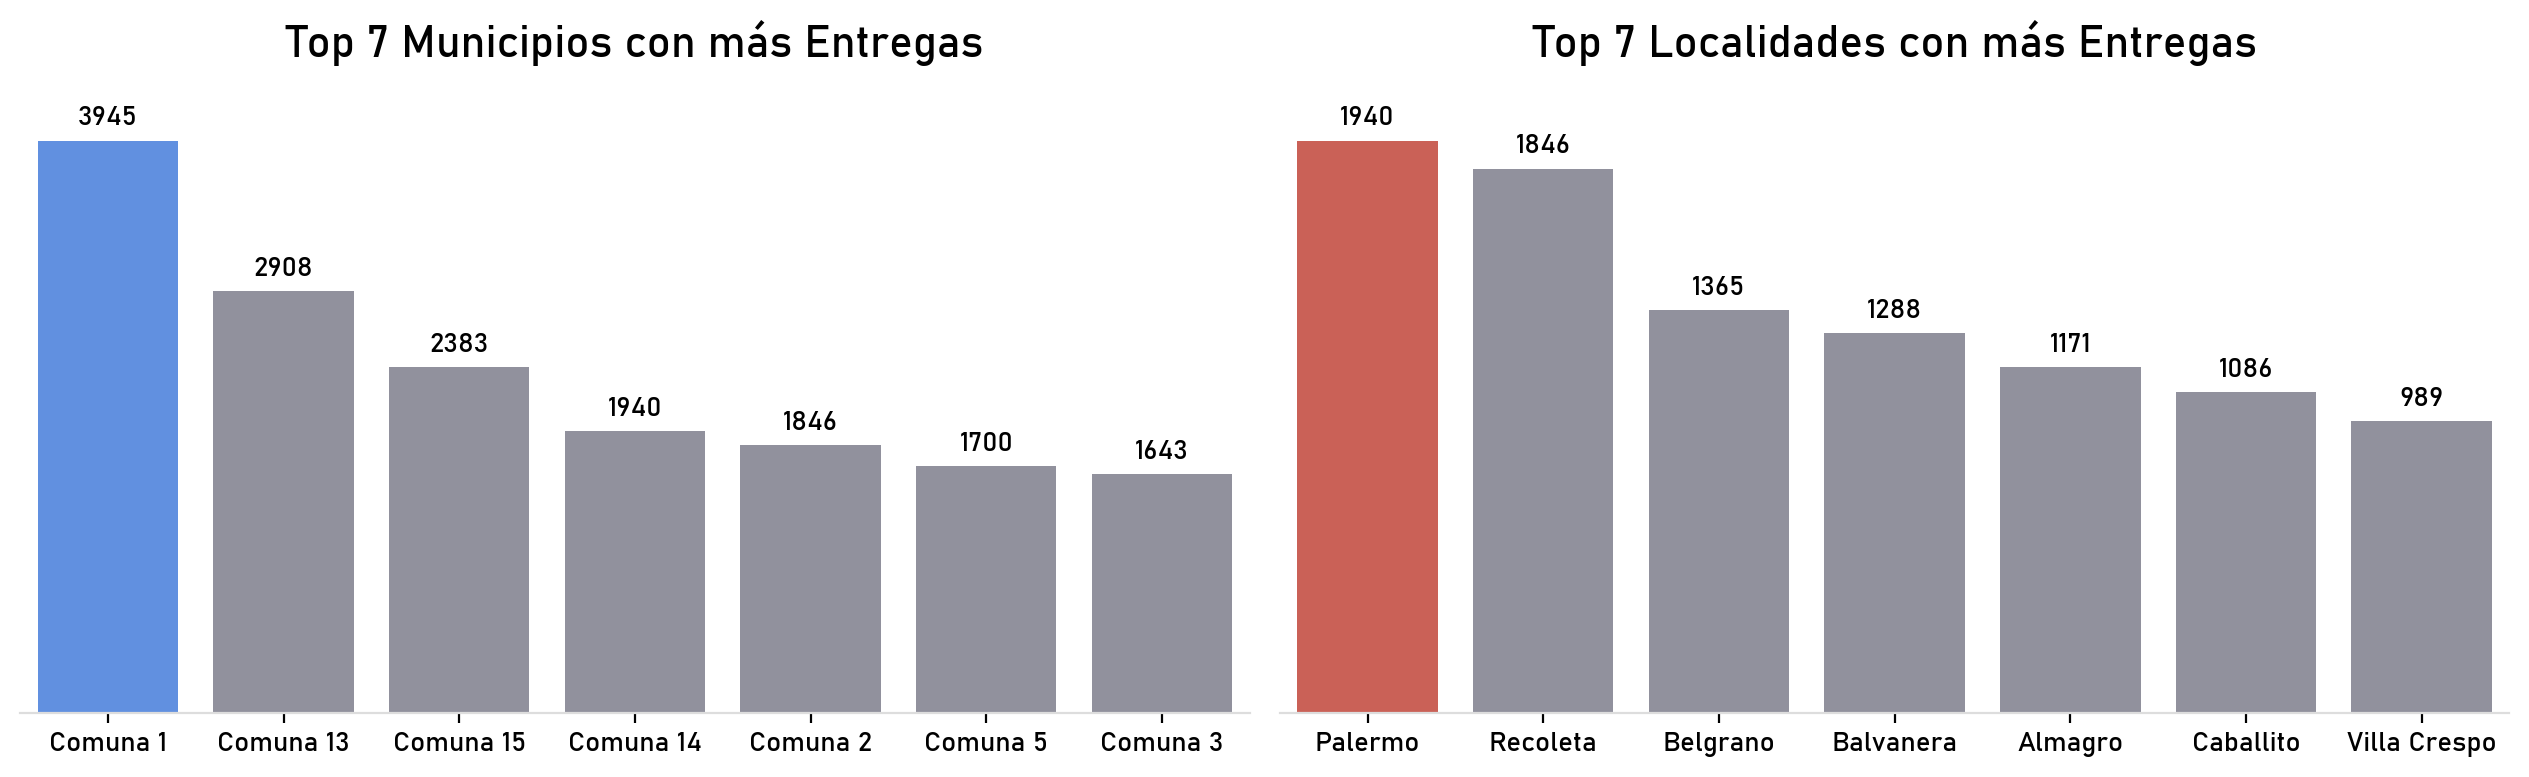

In [122]:
#| echo: false
# Contar las ocurrencias de 'municipio' y 'localidad'
count_municipio = df['municipio'].value_counts().reset_index()
count_municipio['municipio_proporcion'] = count_municipio['municipio'].div(count_municipio['municipio'].sum())

count_localidad = df['localidad'].value_counts().reset_index()
count_localidad['localidad_proporcion'] = count_localidad['localidad'].div(count_localidad['localidad'].sum())

# Configurar la fuente
plt.rcParams['font.family'] = 'Bahnschrift'

# Crear una figura con dos gráficos uno al lado del otro
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12.8, 4))

# Gráfico de barras para los municipios
sns.barplot(x='index', y='municipio', data=count_municipio.head(7), 
            palette=['#4C8BF5'] + ['#8f8f9f'] * (len(count_municipio) - 1), width=.8, ax=ax1)

# Personalizar apariencia del primer gráfico
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['bottom'].set_color('#DDDDDD')
ax1.yaxis.set_visible(False)
ax1.set_title('Top 7 Municipios con más Entregas', fontsize=16, fontweight='bold', pad=20)
ax1.set_xlabel('')
ax1.set_ylabel('Cantidad de Entregas')

# Agregar anotaciones en porcentaje encima de cada barra
for p in ax1.patches:
    porcentaje = f'{p.get_height():.0f}'
    ax1.annotate(porcentaje, 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='center', 
                 fontsize=10, color='black', 
                 xytext=(0, 8), 
                 textcoords='offset points')

# Gráfico de barras para las localidades
sns.barplot(x='index', y='localidad', data=count_localidad.head(7), 
            palette=['#DD5144'] + ['#8f8f9f'] * (len(count_localidad) - 1), width=.8, ax=ax2)

# Personalizar apariencia del segundo gráfico
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['bottom'].set_color('#DDDDDD')
ax2.yaxis.set_visible(False)
ax2.set_title('Top 7 Localidades con más Entregas', fontsize=16, fontweight='bold', pad=20)
ax2.set_xlabel('')
ax2.set_ylabel('Cantidad de Entregas')

# Agregar anotaciones en porcentaje encima de cada barra
for p in ax2.patches:
    porcentaje = f'{p.get_height():.0f}'
    ax2.annotate(porcentaje, 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='center', 
                 fontsize=10, color='black', 
                 xytext=(0, 8), 
                 textcoords='offset points')

# Ajustar el diseño
plt.tight_layout()
plt.show()


Creando un heatmap para las entregas realizadas a cada cliente por separado, podemos ver como ambos tienden a recibir entregas en similares localidades zonas en CABA, pero tienen una diferencia: El Cliente 20 recibe entregas fuera de CABA mientras que el Cliente 70 se enfoca exclusivamente en CABA.

#### Heatmap de entregas del Cliente 20

In [129]:
#| echo: false
# Crear el mapa centrado en Buenos Aires
m = folium.Map(location = [-34.603722, -58.381592], zoom_start = 12)

# Paso 1: Crear el HeatMap con todas las coordenadas de los repartos
heat_data = df_cliente_20[['latitud', 'longitud']].values.tolist()  # Coordenadas individuales de los repartos

# Añadir el HeatMap
HeatMap(heat_data, 
        min_opacity=0.3,  
        max_opacity=0.8,  
        radius=25,        
        blur=15,          
        gradient={        
            0.1: 'blue',    
            0.4: 'green',   
            0.7: 'yellow',  
            1.0: 'red'      
        }).add_to(m)

# Guardar el mapa en un archivo HTML
m

#### Heatmap de entregas del Cliente 70

In [130]:
#| echo: false
# Crear el mapa centrado en Buenos Aires
m = folium.Map(location = [-34.603722, -58.381592], zoom_start = 12)

# Paso 1: Crear el HeatMap con todas las coordenadas de los repartos
heat_data = df_cliente_70[['latitud', 'longitud']].values.tolist()  # Coordenadas individuales de los repartos

# Añadir el HeatMap
HeatMap(heat_data, 
        min_opacity=0.3,  
        max_opacity=0.8,  
        radius=25,        
        blur=15,          
        gradient={        
            0.1: 'blue',    
            0.4: 'green',   
            0.7: 'yellow',  
            1.0: 'red'      
        }).add_to(m)

# Guardar el mapa en un archivo HTML
m

In [131]:
#| echo: false
df['FinVisitaReal']    = pd.to_datetime(df['FinVisitaReal'])
df['InicioVisitaReal'] = pd.to_datetime(df['InicioVisitaReal'])
df['Demora_Inicio_Fin'] = round((df['FinVisitaReal'] - df['InicioVisitaReal']).dt.seconds.div(60),2)

In [132]:
#| echo: false
df['VisitaHora_Inicio_UNICO'] = df['InicioVisitaReal'].dt.hour
count_horas = df['VisitaHora_Inicio_UNICO'].value_counts().reset_index()
count_horas = count_horas.sort_values(by='index')

<hr></hr>

# Análisis Temporal de las Entregas

Investigando la hora en la que las entregas se realizaron, obtuvimos la dsitribución de dicha variable: La cantidad de entregas realizadas por hora va en incremento hasta las 15hs, hora en la que se realizan la mayoría de los pedidos y luego decrece drásticamente a partir de las 17hs.

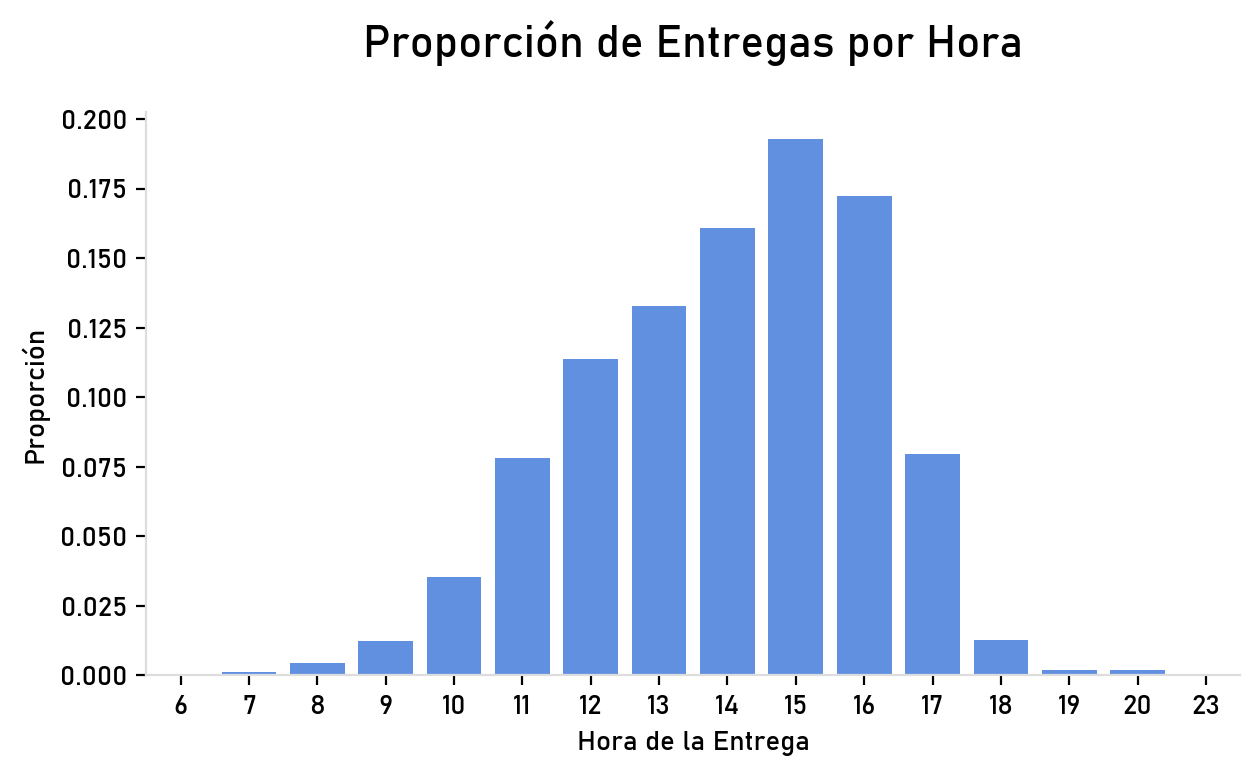

In [69]:
#| echo: false
# Supongamos que merged_df_1 ya está definido y contiene las columnas necesarias
count_horas['Count'] = count_horas['VisitaHora_Inicio_UNICO'].div(count_horas['VisitaHora_Inicio_UNICO'].sum())
count_horas['index'] = count_horas['index'].astype(int)

# Configurar la fuente
mpl.rcParams['font.family'] = 'Bahnschrift'

# Crear el gráfico de barras
plt.figure(figsize=(6.4, 4))
ax = sns.barplot(x='index', y='Count', data=count_horas, color='#4C8BF5', width=.8)

# Personalizar apariencia
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('#DDDDDD')
ax.spines['bottom'].set_color('#DDDDDD')
ax.yaxis.set_visible(True)  # Mostrar el eje y

# Agregar título y etiquetas
plt.title('Proporción de Entregas por Hora', fontsize=16, fontweight='bold', pad=20)  # Aumentar tamaño y hacer negrita
plt.xlabel('Hora de la Entrega')  # Etiqueta para el eje x
plt.ylabel('Proporción')  # Etiqueta para el eje x

# Mostrar el gráfico
plt.tight_layout()
plt.show()

Comparando las horas en las que se realizan las entregas de cada cliente, podemos ver una clara diferencia entre ambos clientes:
* La gran mayoría de las entregas al Cliente 70 se realizan entre las 14hs y 16hs.
* La gran mayoría de las entregas del Cliente 20 se realizan entre las 12hs y 16hs.

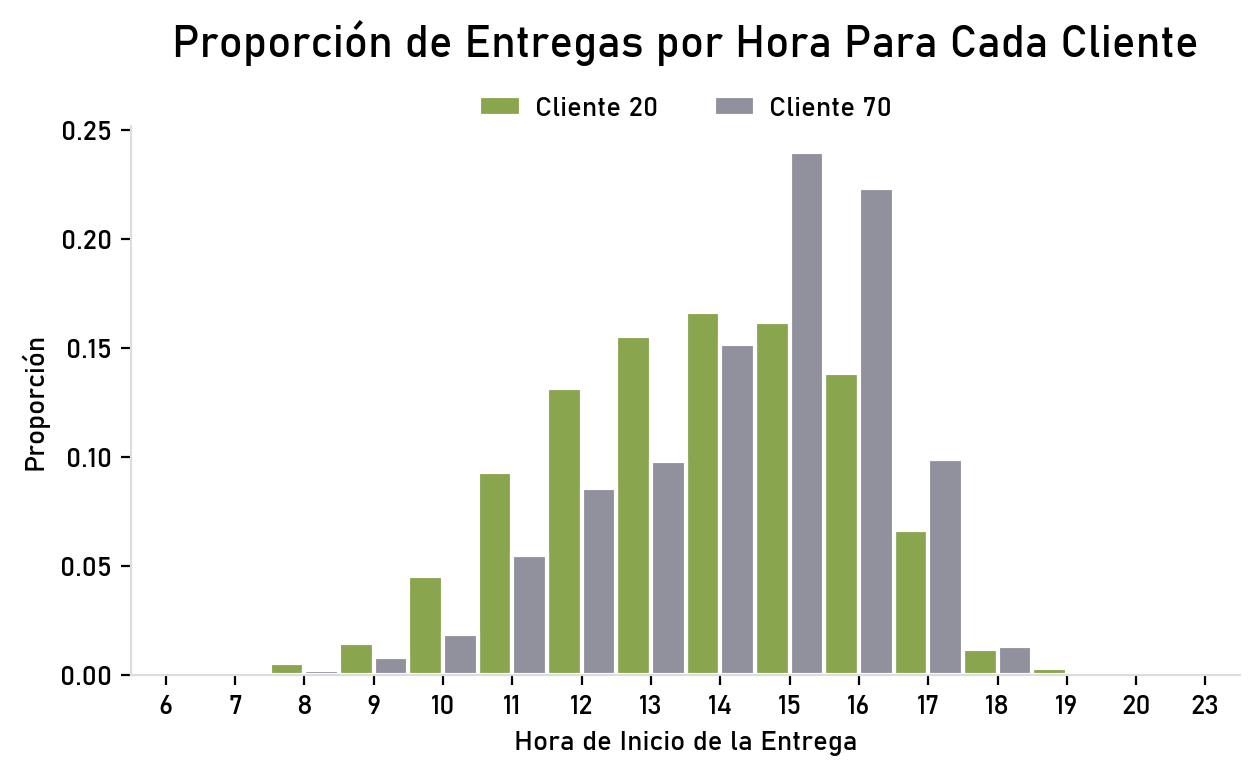

In [72]:
#| echo: false
# Supongamos que df_cliente_20 y df_cliente_70 ya están definidos y contienen las columnas necesarias
# Procesar datos para Cliente 20
df_cliente_20['VisitaHora_Inicio_UNICO'] = pd.to_datetime(df_cliente_20['InicioVisitaReal']).dt.hour
count_horas_20 = df_cliente_20['VisitaHora_Inicio_UNICO'].value_counts().reset_index()
count_horas_20 = count_horas_20.sort_values(by='index')
count_horas_20['Count'] = count_horas_20['VisitaHora_Inicio_UNICO'].div(count_horas_20['VisitaHora_Inicio_UNICO'].sum())
count_horas_20['index'] = count_horas_20['index'].astype(int)
count_horas_20['Cliente'] = 'Cliente 20'  # Agregar una columna para identificar al cliente

# Procesar datos para Cliente 70
df_cliente_70['VisitaHora_Inicio_UNICO'] = pd.to_datetime(df_cliente_70['InicioVisitaReal']).dt.hour
count_horas_70 = df_cliente_70['VisitaHora_Inicio_UNICO'].value_counts().reset_index()
count_horas_70 = count_horas_70.sort_values(by='index')
count_horas_70['Count'] = count_horas_70['VisitaHora_Inicio_UNICO'].div(count_horas_70['VisitaHora_Inicio_UNICO'].sum())
count_horas_70['index'] = count_horas_70['index'].astype(int)
count_horas_70['Cliente'] = 'Cliente 70'  # Agregar una columna para identificar al cliente

# Combinar los DataFrames
combined_counts = pd.concat([count_horas_20, count_horas_70])

# Configurar la fuente
mpl.rcParams['font.family'] = 'Bahnschrift'

# Crear el gráfico de barras
plt.figure(figsize=(6.4, 4))
ax = sns.barplot(x='index', y='Count', hue='Cliente', data=combined_counts, palette={'Cliente 20': '#8eb440', 'Cliente 70': '#8f8f9f'}, width=1, edgecolor='white', linewidth=1.5)

# Personalizar apariencia
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('#DDDDDD')
ax.spines['bottom'].set_color('#DDDDDD')
ax.yaxis.set_visible(True)  # Mostrar el eje y

# Agregar título y etiquetas
plt.title('Proporción de Entregas por Hora Para Cada Cliente', fontsize=16, fontweight='bold', pad=25)  # Aumentar tamaño y hacer negrita
plt.xlabel('Hora de Inicio de la Entrega')  # Etiqueta para el eje x
plt.ylabel('Proporción')  # Etiqueta para el eje y

# Configurar la leyenda
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), fontsize=10, frameon=False, ncol=2, handlelength=1.5, 
          handletextpad=0.5)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


<hr> </hr>

# Análisis de la Demora por Entrega

Investigando la demora por entrega, nos dimos cuenta que un 37.30% de las entregas no tiene demora, es decir, se registro la misma hora de inicio que de fin de la entrega. A la hora de analizar las demoras, no tomamos en cuenta las demoras iguales a 0 minutos para poder hacer un estudio más óptimo.

Haciendo un promedio de la demora por entrega por hora, podemos ver como a medida que pasa el día, menos tienden a demorar las entregas en realizarse: De las 13hs en adelante, la demora promedio por hora es menor que la demora promedio total.

Si sacamos de lado las demoras que fueron casos excepcionales y extremos, haciendo un promedio de la demora por entrega por hora, podemos ver que el comportamiento sigue siendo el mismo, pero la demora promedio por hora y la demora promedio total es considerablemente menor: De las 16hs en adelante, la demora promedio por hora es menor que la demora promedio total.

In [102]:
#| echo: false
df_con_demora = df[df['Demora_Inicio_Fin']!=0]
Q1  = df_con_demora['Demora_Inicio_Fin'].quantile(0.25)
Q3  = df_con_demora['Demora_Inicio_Fin'].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Creamos dos dataframes: uno sin los outliers y otro de solo los outliers
df_sin_outliers = df_con_demora[(df_con_demora['Demora_Inicio_Fin'] >= limite_inferior) & (df_con_demora['Demora_Inicio_Fin'] <= limite_superior)]
df_outliers     = df_con_demora[(df_con_demora['Demora_Inicio_Fin'] <= limite_inferior) | (df_con_demora['Demora_Inicio_Fin'] >= limite_superior)]

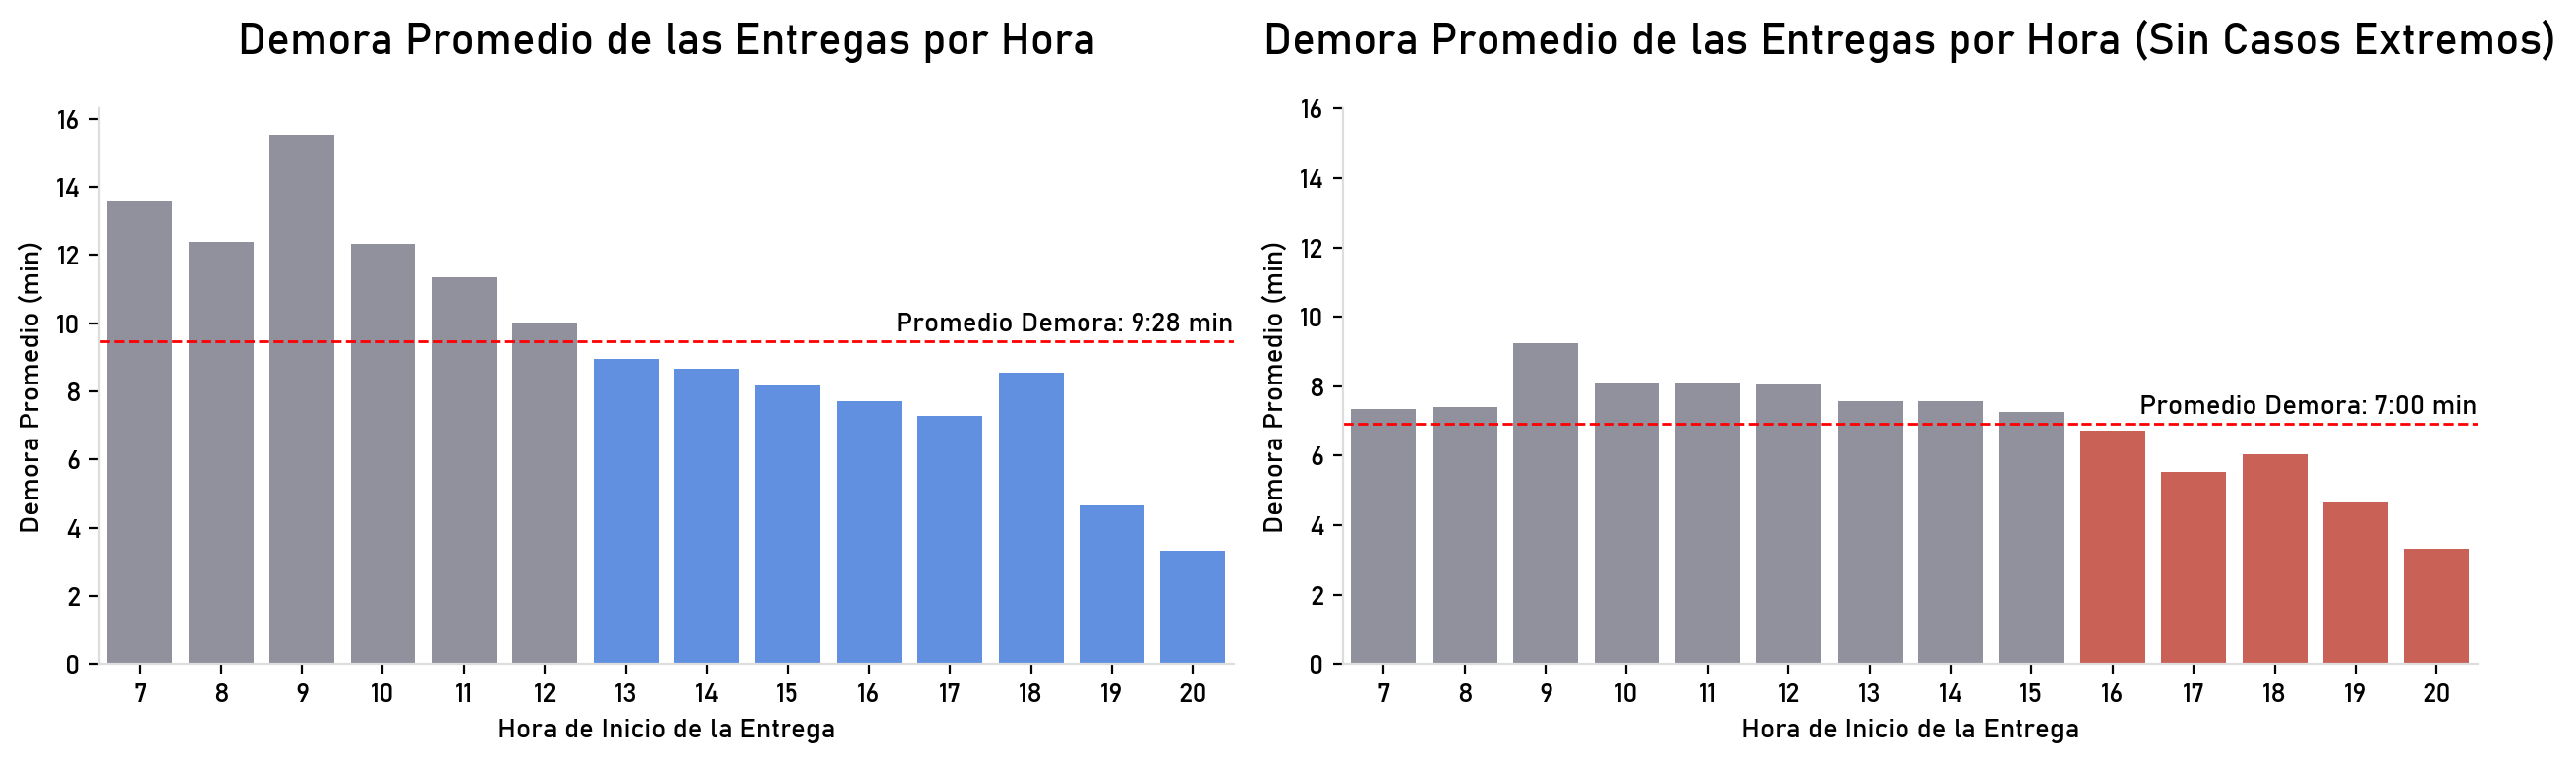

In [123]:
#| echo: false
# Filtrar datos y crear el primer conjunto de datos
df_con_demora = df[df['Demora_Inicio_Fin'] != 0]
df_asd1 = df_con_demora.groupby('VisitaHora_Inicio_UNICO')['Demora_Inicio_Fin'].mean().reset_index()[1:]
df_asd1['VisitaHora_Inicio_UNICO'] = df_asd1['VisitaHora_Inicio_UNICO'].astype(int)

# Filtrar datos y crear el segundo conjunto de datos
df_con_demora = df_sin_outliers[df_sin_outliers['Demora_Inicio_Fin'] != 0]
df_asd2 = df_con_demora.groupby('VisitaHora_Inicio_UNICO')['Demora_Inicio_Fin'].mean().reset_index()
df_asd2['VisitaHora_Inicio_UNICO'] = df_asd2['VisitaHora_Inicio_UNICO'].astype(int)

# Configurar la fuente
plt.rcParams['font.family'] = 'Bahnschrift'

# Crear una figura con dos gráficos uno al lado del otro
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12.8, 4))

# Colores para el primer gráfico
colores1 = ['#4C8BF5' if x >= 13 else '#8f8f9f' for x in df_asd1['VisitaHora_Inicio_UNICO']]

# Primer gráfico
sns.barplot(x='VisitaHora_Inicio_UNICO', y='Demora_Inicio_Fin', data=df_asd1, palette=colores1, ax=ax1, width=.8)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_color('#DDDDDD')
ax1.spines['bottom'].set_color('#DDDDDD')
ax1.axhline(y=df_asd1['Demora_Inicio_Fin'].mean(), color='red', linestyle='--', linewidth=1)
ax1.text(x=len(df_asd1) - 0.5, y=df_asd1['Demora_Inicio_Fin'].mean() + 0.3, s='Promedio Demora: 9:28 min',
         color='black', fontsize=10, ha='right')
ax1.set_title('Demora Promedio de las Entregas por Hora', fontsize=16, fontweight='bold', pad=20)
ax1.set_xlabel('Hora de Inicio de la Entrega')
ax1.set_ylabel('Demora Promedio (min)')

# Colores para el segundo gráfico
colores2 = ['#DD5144' if x >= 16 else '#8f8f9f' for x in df_asd2['VisitaHora_Inicio_UNICO']]

# Segundo gráfico
sns.barplot(x='VisitaHora_Inicio_UNICO', y='Demora_Inicio_Fin', data=df_asd2, palette=colores2, ax=ax2, width=.8)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_color('#DDDDDD')
ax2.spines['bottom'].set_color('#DDDDDD')
ax2.axhline(y=df_asd2['Demora_Inicio_Fin'].mean(), color='red', linestyle='--', linewidth=1)
ax2.text(x=len(df_asd2) - 0.5, y=df_asd2['Demora_Inicio_Fin'].mean() + 0.3, s='Promedio Demora: 7:00 min',
         color='black', fontsize=10, ha='right')
ax2.set_title('Demora Promedio de las Entregas por Hora (Sin Casos Extremos)', fontsize=16, fontweight='bold', pad=20)
ax2.set_xlabel('Hora de Inicio de la Entrega')
ax2.set_ylabel('Demora Promedio (min)')
ax2.set_ylim(0, 16)

# Ajustar el diseño
plt.tight_layout()
plt.show()


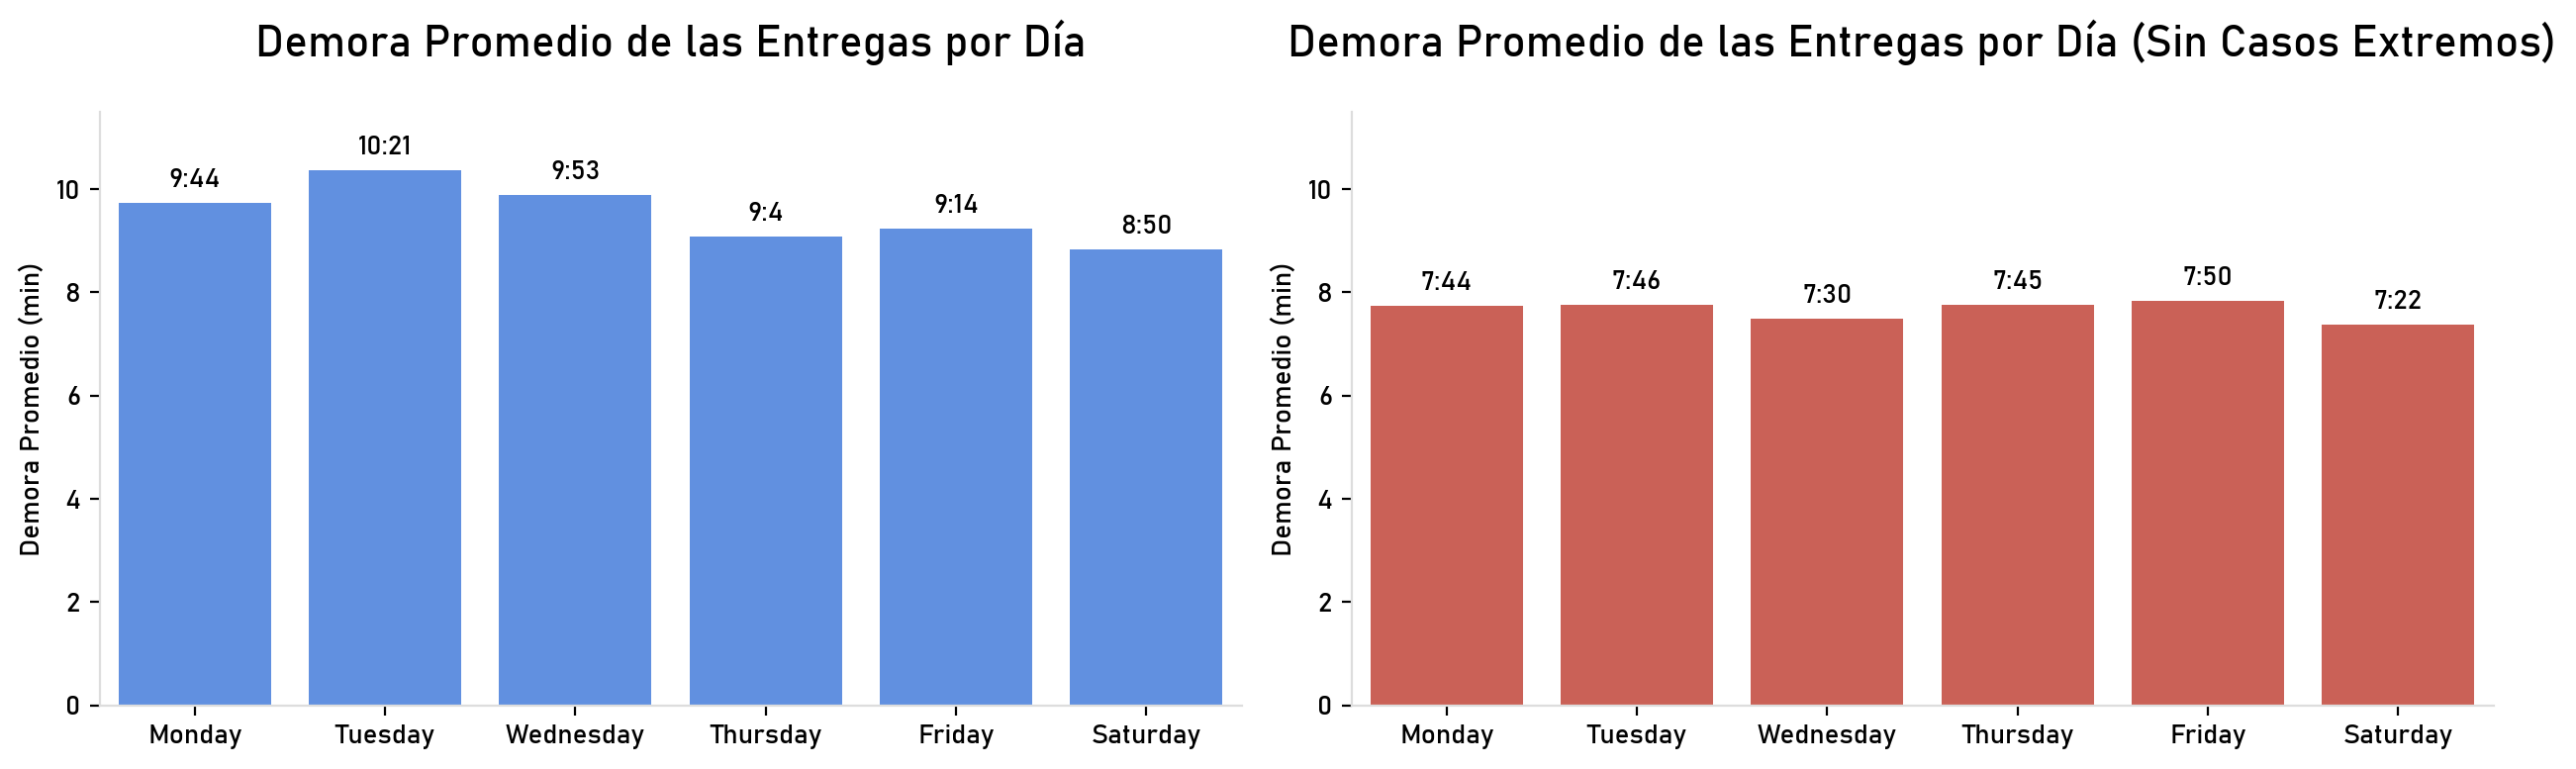

In [124]:
#| echo: false
# Filtrar datos y preparar los conjuntos para los gráficos
df_con_demora = df[df['Demora_Inicio_Fin'] != 0]
dias_semana = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
df_con_demora_graficar = df_con_demora.groupby('VisitaDia')['Demora_Inicio_Fin'].mean().reindex(dias_semana).reset_index()

df_con_demora_sin_outliers = df_sin_outliers[df_sin_outliers['Demora_Inicio_Fin'] != 0]
df_con_demora_sin_outliers_graficar = df_con_demora_sin_outliers.groupby('VisitaDia')['Demora_Inicio_Fin'].mean().reindex(dias_semana).reset_index()

# Configurar la fuente
plt.rcParams['font.family'] = 'Bahnschrift'

# Crear una figura con dos gráficos uno al lado del otro
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12.8, 4))

# Primer gráfico: Demora promedio con todos los datos
sns.barplot(x='VisitaDia', y='Demora_Inicio_Fin', data=df_con_demora_graficar, color='#4C8BF5', ax=ax1, width=.8)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_color('#DDDDDD')
ax1.spines['bottom'].set_color('#DDDDDD')
ax1.set_title('Demora Promedio de las Entregas por Día', fontsize=16, fontweight='bold', pad=20)
ax1.set_xlabel('')
ax1.set_ylabel('Demora Promedio (min)')
ax1.set_ylim(0, 11.5)

# Agregar los valores de cada barra encima de ellas
for p in ax1.patches:
    ax1.annotate(f'{p.get_height()//1:.0f}:{(p.get_height() - p.get_height()//1)*60:.0f}', 
                 (p.get_x() + p.get_width() / 2., p.get_height() + 0.2), 
                 ha='center', va='bottom', fontsize=10)

# Segundo gráfico: Demora promedio sin casos extremos
sns.barplot(x='VisitaDia', y='Demora_Inicio_Fin', data=df_con_demora_sin_outliers_graficar, color='#DD5144', ax=ax2, width=.8)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_color('#DDDDDD')
ax2.spines['bottom'].set_color('#DDDDDD')
ax2.set_title('Demora Promedio de las Entregas por Día (Sin Casos Extremos)', fontsize=16, fontweight='bold', pad=20)
ax2.set_xlabel('')
ax2.set_ylabel('Demora Promedio (min)')
ax2.set_ylim(0, 11.5)

# Agregar los valores de cada barra encima de ellas
for p in ax2.patches:
    ax2.annotate(f'{p.get_height()//1:.0f}:{(p.get_height() - p.get_height()//1)*60:.0f}', 
                 (p.get_x() + p.get_width() / 2., p.get_height() + 0.2), 
                 ha='center', va='bottom', fontsize=10)

# Ajustar el diseño
plt.tight_layout()
plt.show()


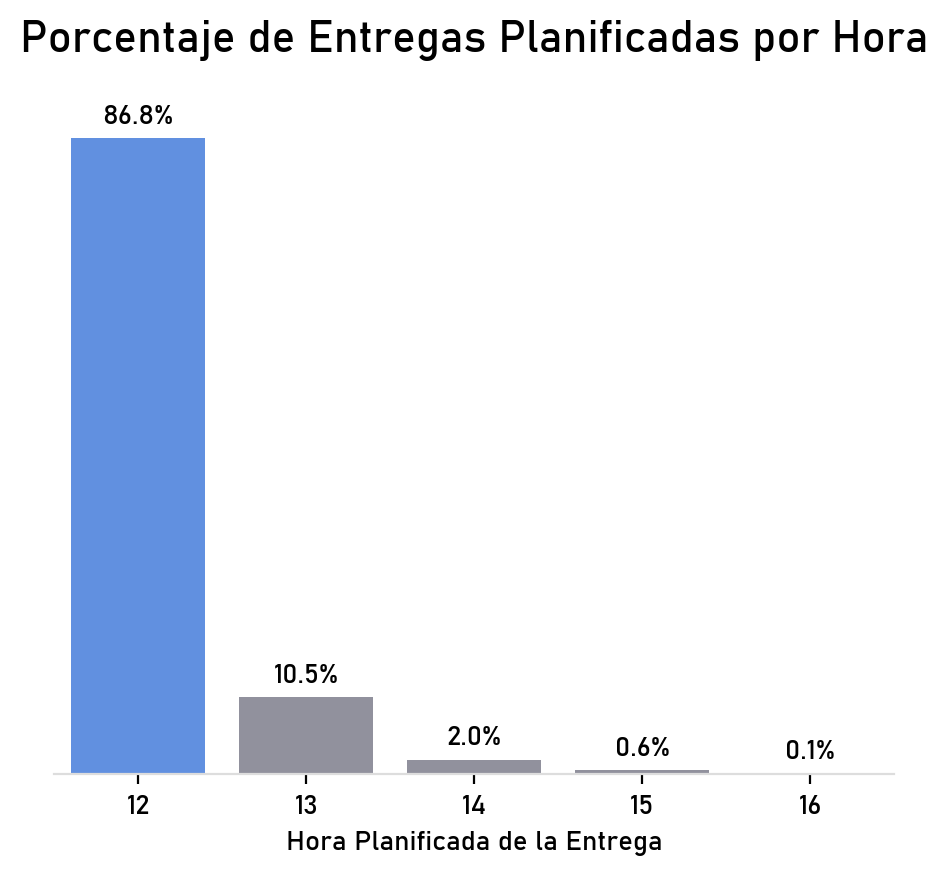

In [128]:
#| echo: false
# Convertir la columna 'VisitaPlanificada' a datetime y extraer la hora
df['VisitaPlanificada_Hora_UNICO'] = pd.to_datetime(df['VisitaPlanificada']).dt.hour

# Contar las ocurrencias de 'VisitaHora_Inicio_UNICO'
count_horas = df['VisitaPlanificada_Hora_UNICO'].value_counts().reset_index()
count_horas['VisitaPlanificada_Hora_UNICO'] = count_horas['VisitaPlanificada_Hora_UNICO'].div(count_horas['VisitaPlanificada_Hora_UNICO'].sum())
count_horas['index'] = count_horas['index'].astype(int)

# Configurar la fuente
plt.rcParams['font.family'] = 'Bahnschrift'

# Crear el gráfico de barras
plt.figure(figsize=(4.5, 4.5))
ax = sns.barplot(x='index', y='VisitaPlanificada_Hora_UNICO', data=count_horas, palette=['#4C8BF5'] + ['#8f8f9f']*(len(count_horas)-1), width=.8)

# Personalizar apariencia
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.yaxis.set_visible(False)

# Agregar título y etiquetas
plt.title('Porcentaje de Entregas Planificadas por Hora', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Hora Planificada de la Entrega')
plt.ylabel('')

# Agregar anotaciones en porcentaje encima de cada barra
for p in ax.patches:
    porcentaje = f'{p.get_height() * 100:.1f}%'
    ax.annotate(porcentaje, 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=10, color='black', 
                xytext=(0, 8), 
                textcoords='offset points')

# Mostrar el gráfico
plt.tight_layout()
plt.show()


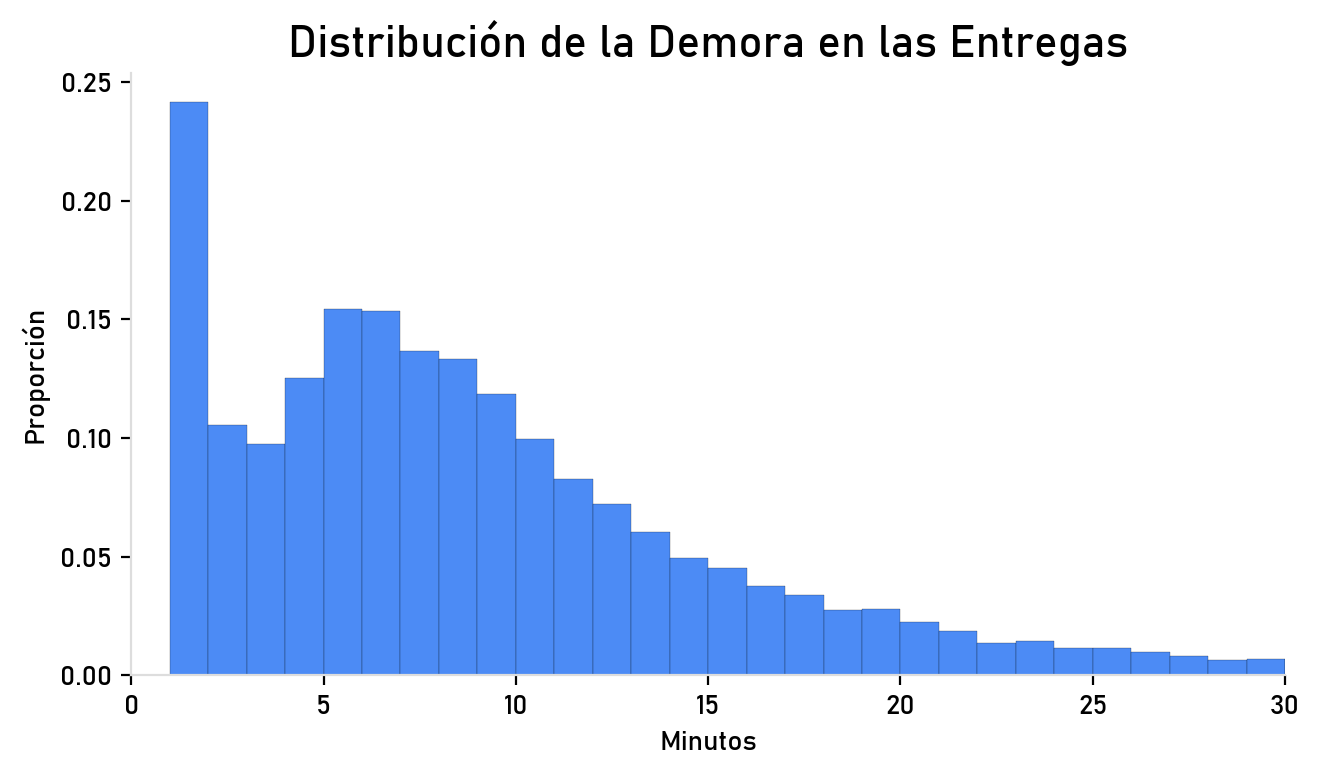

In [83]:
#| echo: false
# Prepare the data
asdasdasd = df[df['Demora_Inicio_Fin'] != 0].copy()
asdasdasd = asdasdasd.dropna()
asdasdasd['Demora_Inicio_Fin'] = asdasdasd['Demora_Inicio_Fin'].astype(int)
asdasdasd = asdasdasd[asdasdasd['Demora_Inicio_Fin'] != 0].groupby('cliente')['Demora_Inicio_Fin'].value_counts(normalize=True).reset_index(name='count')

# Create the histogram
plt.figure(figsize=(6.7, 4))
ax = sns.histplot(data=asdasdasd, x='Demora_Inicio_Fin', weights='count',
                  bins=range(asdasdasd['Demora_Inicio_Fin'].min(), asdasdasd['Demora_Inicio_Fin'].max() + 1),
                  kde=False, color='#4C8BF5', alpha=1)

# Customize the plot
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('#DDDDDD')
ax.spines['bottom'].set_color('#DDDDDD')

# Add title and labels
plt.title('Distribución de la Demora en las Entregas', fontsize=16, fontweight='bold')
plt.xlabel('Minutos')
plt.ylabel('Proporción')
plt.xlim(0, 30)
# plt.ylim(0,0.14)
# Show the plot
plt.tight_layout()
plt.show()


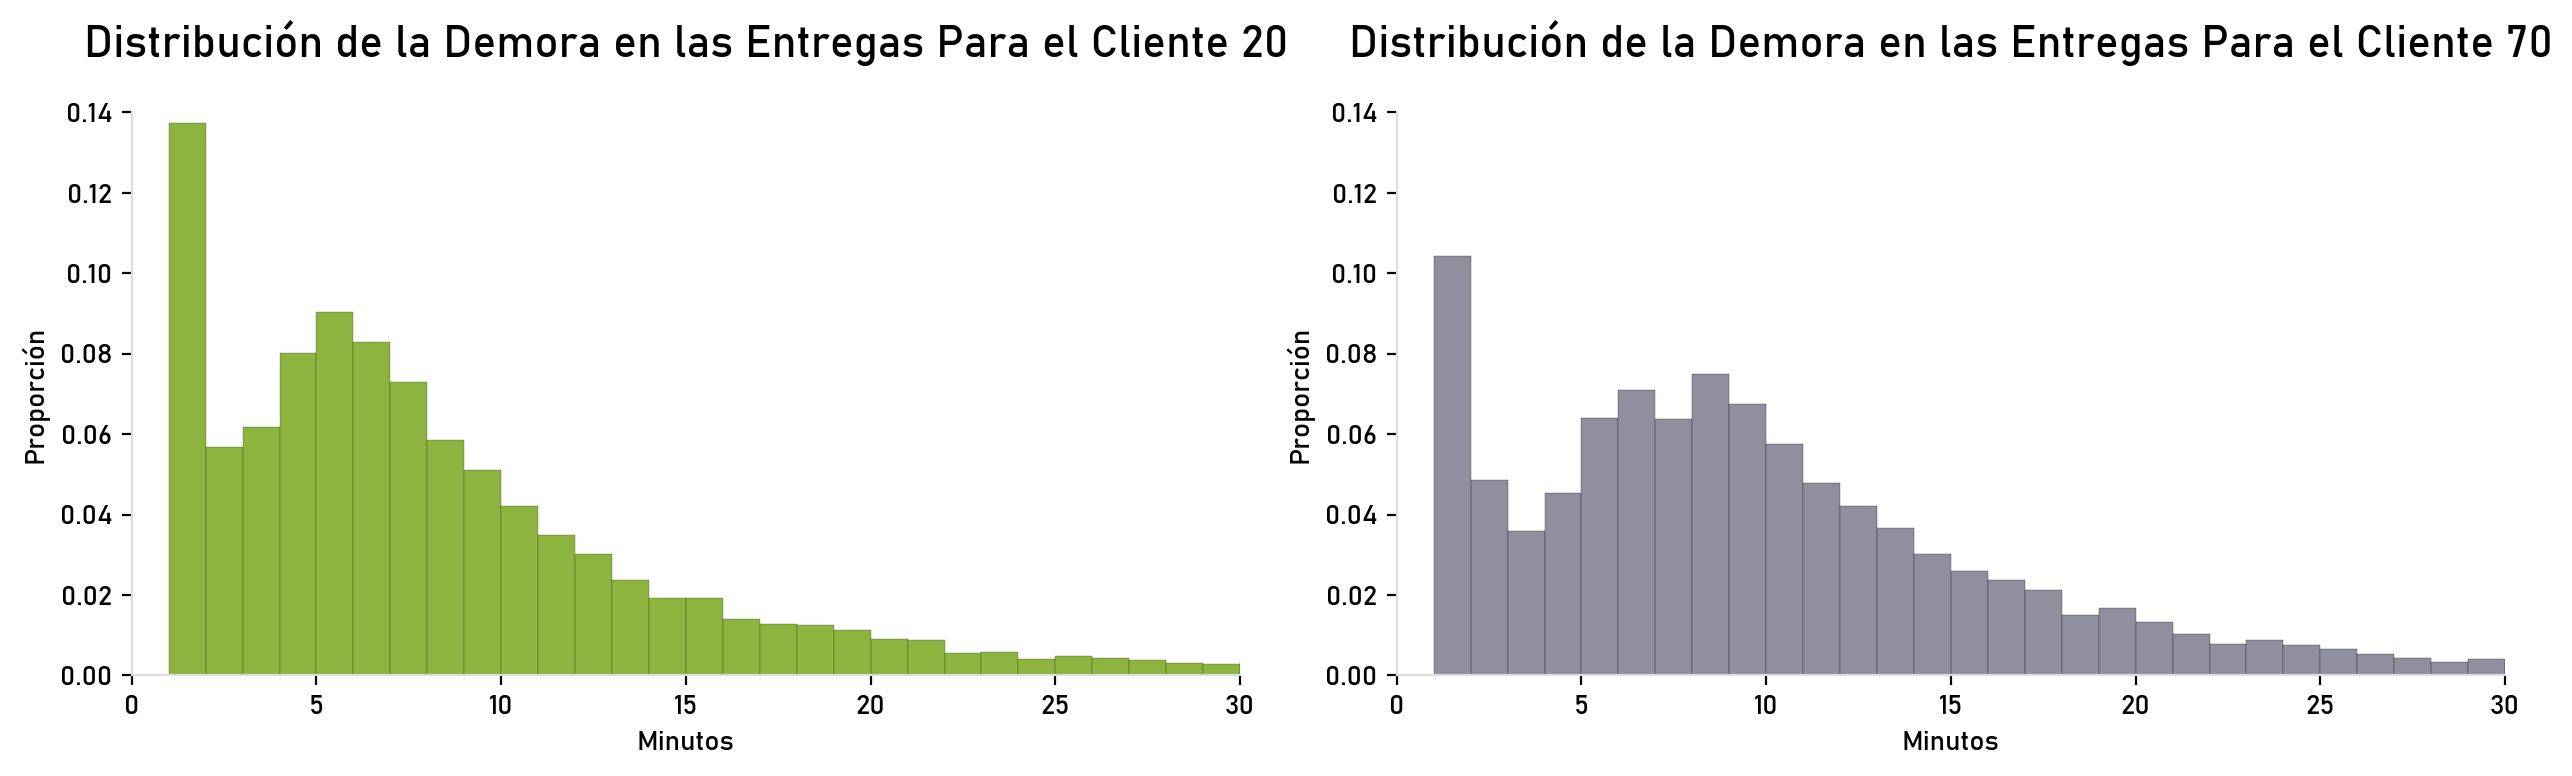

In [87]:
#| echo: false
# Preparar los datos para el Cliente 20
asdasdasd = df[df['Demora_Inicio_Fin'] != 0].copy()
asdasdasd = asdasdasd.dropna()
asdasdasd['Demora_Inicio_Fin'] = asdasdasd['Demora_Inicio_Fin'].astype(int)
asdasdasd = asdasdasd[asdasdasd['Demora_Inicio_Fin'] != 0].groupby('cliente')['Demora_Inicio_Fin'].value_counts(normalize=True).reset_index(name='count')
asdasdasd_20 = asdasdasd[asdasdasd['cliente'] == 20]

# Preparar los datos para el Cliente 70
asdasdasd_70 = asdasdasd[asdasdasd['cliente'] == 70]

# Configurar la fuente
plt.rcParams['font.family'] = 'Bahnschrift'

# Crear una figura con dos gráficos uno al lado del otro
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12.8, 4))

# Histograma para el Cliente 20
sns.histplot(data=asdasdasd_20, x='Demora_Inicio_Fin', weights='count',
             bins=range(asdasdasd_20['Demora_Inicio_Fin'].min(), asdasdasd_20['Demora_Inicio_Fin'].max() + 1),
             kde=False, color='#8eb440', alpha=1, ax=ax1)

# Personalizar apariencia del primer gráfico
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_color('#DDDDDD')
ax1.spines['bottom'].set_color('#DDDDDD')
ax1.set_title('Distribución de la Demora en las Entregas Para el Cliente 20', fontsize=16, fontweight='bold', pad=20)
ax1.set_xlabel('Minutos')
ax1.set_ylabel('Proporción')
ax1.set_xlim(0, 30)
ax1.set_ylim(0, 0.14)

# Histograma para el Cliente 70
sns.histplot(data=asdasdasd_70, x='Demora_Inicio_Fin', weights='count',
             bins=range(asdasdasd_70['Demora_Inicio_Fin'].min(), asdasdasd_70['Demora_Inicio_Fin'].max() + 1),
             kde=False, color='#8f8f9f', alpha=1, ax=ax2)

# Personalizar apariencia del segundo gráfico
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_color('#DDDDDD')
ax2.spines['bottom'].set_color('#DDDDDD')
ax2.set_title('Distribución de la Demora en las Entregas Para el Cliente 70', fontsize=16, fontweight='bold', pad=20)
ax2.set_xlabel('Minutos')
ax2.set_ylabel('Proporción')
ax2.set_xlim(0, 30)
ax2.set_ylim(0, 0.14)

# Ajustar el diseño
plt.tight_layout()
plt.show()


#### Heatmap de Demora

In [133]:
#| echo: false
# Crear el mapa centrado en Buenos Aires
m = folium.Map(location=[-34.603722, -58.381592], zoom_start=12)

# Crear una lista de coordenadas con el peso de Demora_Inicio_Fin
heat_data = df[df['Demora_Inicio_Fin']!=0].dropna()[['latitud', 'longitud', 'Demora_Inicio_Fin']].values.tolist()

# Añadir el HeatMap con la intensidad basada en Demora_Inicio_Fin
HeatMap(heat_data, 
        min_opacity=0.3,  
        max_opacity=0.8,  
        radius=25,        
        blur=15,          
        gradient={        
            0.1: 'blue',    
            0.4: 'green',   
            0.7: 'yellow',  
            1.0: 'red'      
        }).add_to(m)

# Guardar el mapa en un archivo HTML
m

<div>
Observando el Heatmap, podemos observar que pareciera haber zonas geográficas que se tiende a demorar más en hacer las entregas que otras. A continuación, mostramos cuales son los 7 municipios y 7 localidades con más demoras.

<hr></hr>

# Análisis de Bulto, Unidades y Peso

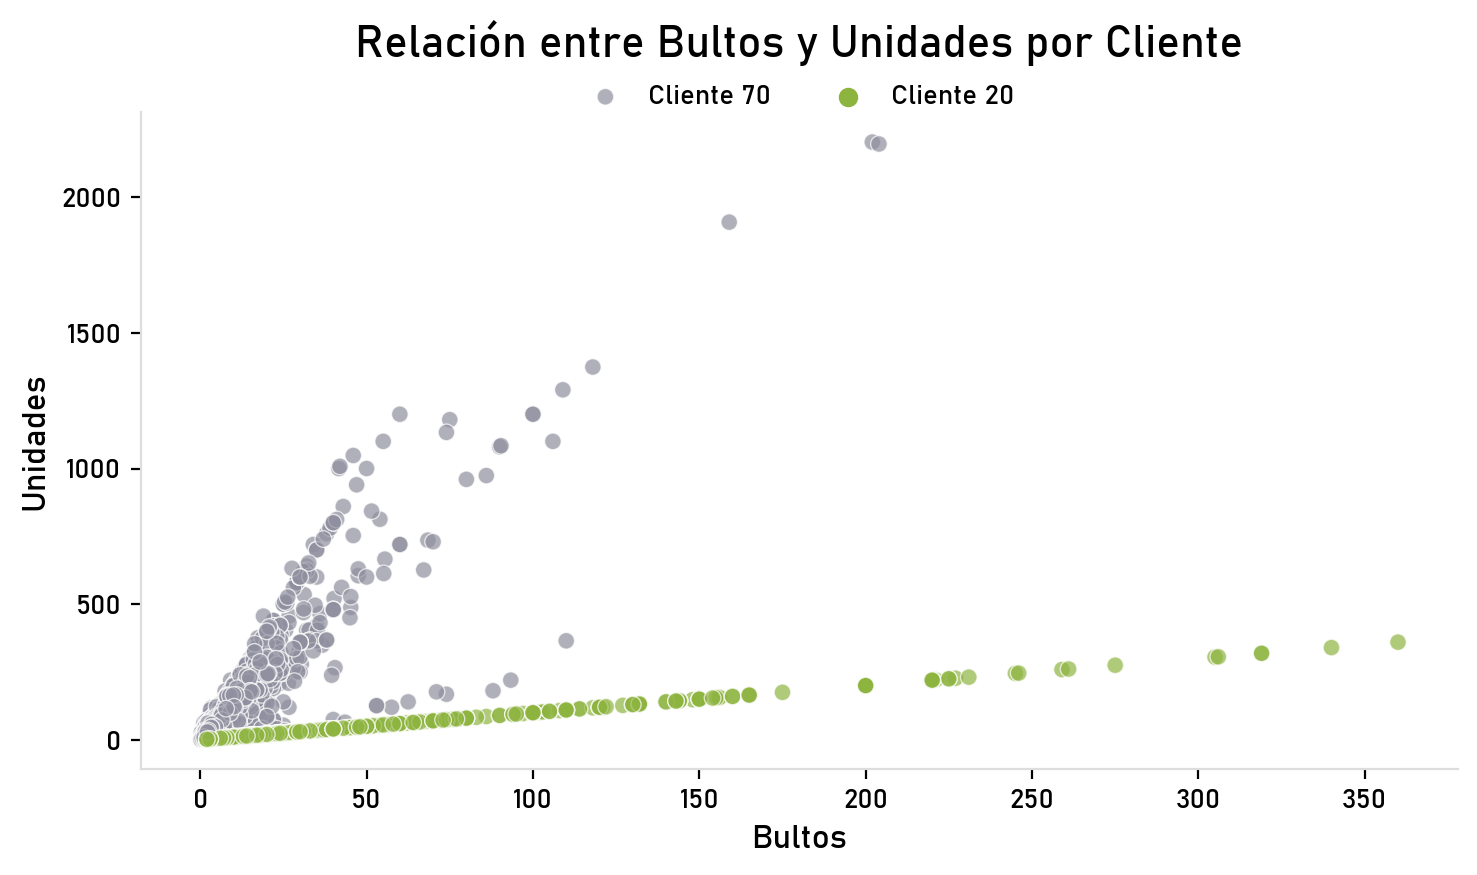

In [126]:
#| echo: false
# Configurar la familia de fuentes
plt.rcParams['font.family'] = 'Bahnschrift'

# Crear el scatter plot de Bultos vs Unidades, coloreado por cliente
plt.figure(figsize=(7.5, 4.5))
scatter_plot = sns.scatterplot(
    data=df, 
    x='Bultos', 
    y='Unidades', 
    hue='cliente', 
    palette=['#8eb440', '#8f8f9f'],  # Usar los mismos colores que el gráfico anterior
    alpha=0.7
)

# Personalizar la apariencia del gráfico
scatter_plot.spines['top'].set_visible(False)
scatter_plot.spines['right'].set_visible(False)
scatter_plot.spines['left'].set_color('#DDDDDD')
scatter_plot.spines['bottom'].set_color('#DDDDDD')

# Configurar la leyenda
legend_labels = ['Cliente 70', 'Cliente 20']
scatter_plot.legend(
    legend_labels, 
    loc='upper center', 
    bbox_to_anchor=(0.5, 1.08), 
    fontsize=10, 
    frameon=False, 
    ncol=2, 
    handlelength=1.5
)

# Añadir título y etiquetas
plt.title('Relación entre Bultos y Unidades por Cliente', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Bultos', fontsize=12)
plt.ylabel('Unidades', fontsize=12)

# Ajustar el layout para evitar solapamientos
plt.tight_layout()

# Mostrar el gráfico
plt.show()

Podemos ver una asociacion positiva entre unidades y bultos con una pendiente mucho mayor para el cliente 70 que el 20, aunque para el cliente 20 una gran cantidad de bultos no necesariamente esta relacionado con un alta cantidad de unidades
El cliente 70 tiene una tendencia de tener grandes unidades con pocos bultos, mientras que el cliente 20 tiene a tener grandes bultos con pocas unidades

En general, ambos clientes tienen comportamiento distintos:

- El cliente 20 tiende a hacer pedidos con una relacion mas alta de unidades con una mayor dispersion en los datos (debido posiblemente a distintos productos)

- El cliente 70 tiende a hacer pedidos con datos muy heteregeneos con mas bultos que unidades (puede deberse a que siempre pide productos similares o identicos)

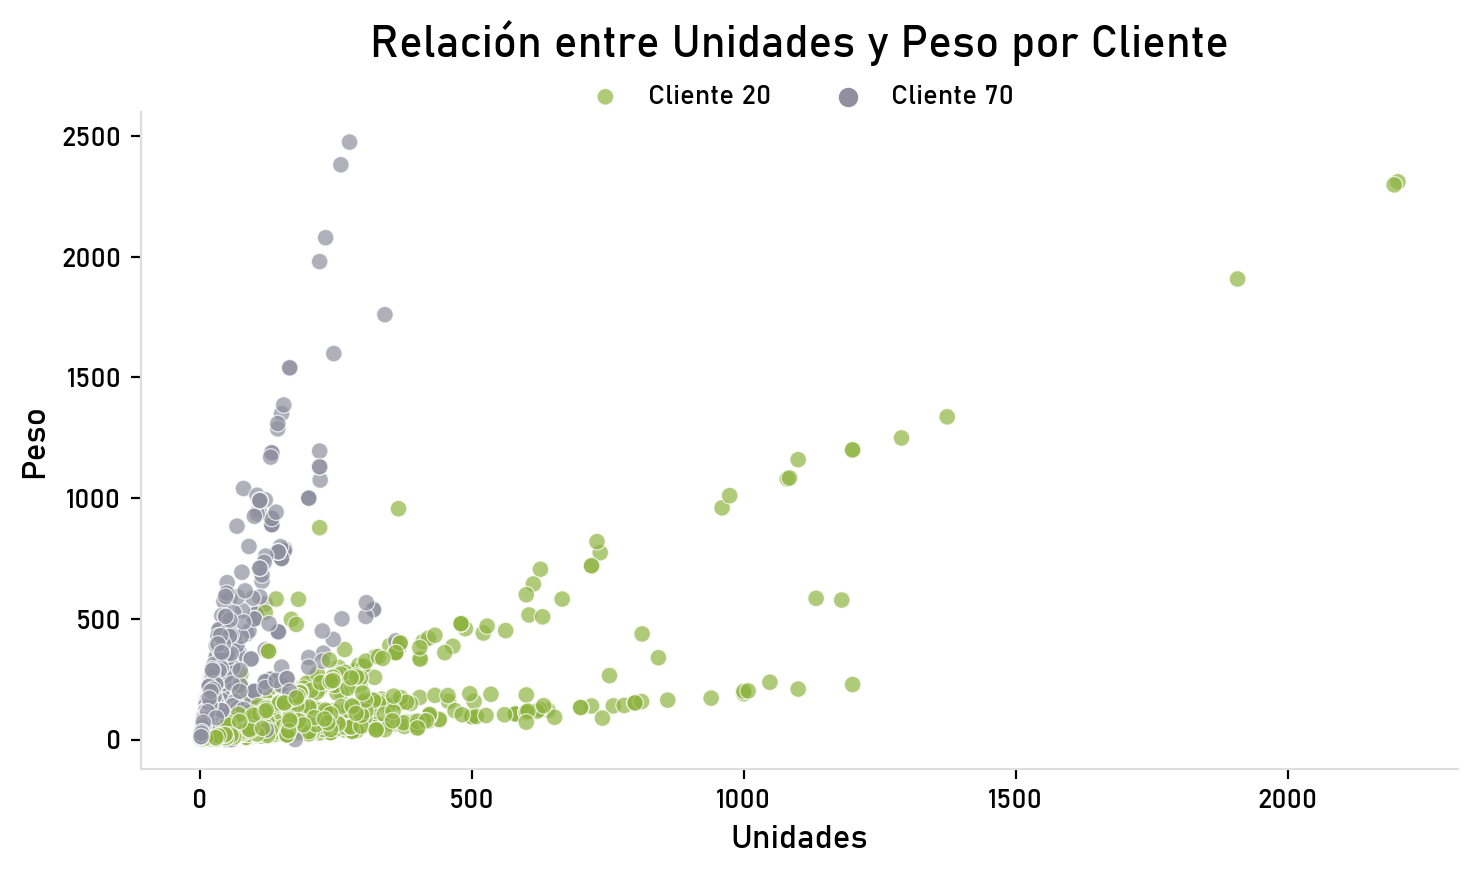

In [127]:
#| echo: false
# Configurar la familia de fuentes
plt.rcParams['font.family'] = 'Bahnschrift'

# Crear el scatter plot de Unidades vs Peso, coloreado por cliente
plt.figure(figsize=(7.5, 4.5))
scatter_plot = sns.scatterplot(
    data=df, 
    x='Unidades', 
    y='Peso', 
    hue='cliente', 
    palette=['#8f8f9f', '#8eb440'],  # Usar los mismos colores que el gráfico de barras apiladas
    alpha=0.7
)

# Personalizar la apariencia del gráfico
scatter_plot.spines['top'].set_visible(False)
scatter_plot.spines['right'].set_visible(False)
scatter_plot.spines['left'].set_color('#DDDDDD')
scatter_plot.spines['bottom'].set_color('#DDDDDD')

# Configurar la leyenda
legend_labels = ['Cliente 20', 'Cliente 70']
scatter_plot.legend(
    legend_labels, 
    loc='upper center', 
    bbox_to_anchor=(0.5, 1.08), 
    fontsize=10, 
    frameon=False, 
    ncol=2, 
    handlelength=1.5
)

# Añadir título y etiquetas
plt.title('Relación entre Unidades y Peso por Cliente', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Unidades', fontsize=12)
plt.ylabel('Peso', fontsize=12)

# Ajustar el layout para evitar solapamientos
plt.tight_layout()

# Mostrar el gráfico
plt.show()

El gráfico sugiere que los clientes tienen patrones logisticos distintos:

- El cliente 20 tiende a pedir productos mas pesados y en menor cantidades

- El cliente 70 tiende a pedir productos mas livianos y en mayor unidades 

En resumen:

- Cliente 20: Parece tener entregas mas uniformes y estructuradas especialmente por su relacion entre bultos y unidades sugiriendo que trabaja con productos mas homogeneos en tamaño y cantidad

- Cliente 70: Hay mayor variabilidad en este cliente, lo que nos sugiere que el cliente trabaja con productos mas heterogeneos en volumen y peso. Tambien maneja grandes cantidades de unidades sugiriendo que sus envios son grandes y voluminosos 